In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
#pip install holidays

In [4]:
import holidays

In [5]:
indian_holidays = holidays.India(years=[2023, 2024, 2025])

In [6]:
transaction = pd.read_csv('transactions.csv')

In [7]:
train = pd.read_csv('train.csv')

In [8]:
transaction.shape

(2266100, 11)

In [9]:
holidays_df = pd.DataFrame(indian_holidays.items(), columns=['date_holiday', 'holiday_name'])

holidays_df.sort_values('date_holiday', inplace=True)

In [10]:
holidays_df['date_holiday'] = holidays_df['date_holiday'].astype(str).str.strip()

In [11]:
holidays_df['date_holiday'] = holidays_df['date_holiday'].astype(str).str.replace(r'\s+', '', regex=True)

In [12]:
holidays_df['date_holiday'] = pd.to_datetime(holidays_df['date_holiday'], errors='coerce')

In [13]:
print(holidays_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 31 to 30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_holiday  47 non-null     datetime64[ns]
 1   holiday_name  47 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.1+ KB
None


In [14]:
print(holidays_df)

   date_holiday              holiday_name
31   2023-01-26              Republic Day
39   2023-02-18           Maha Shivaratri
38   2023-04-04           Mahavir Jayanti
45   2023-04-07               Good Friday
43   2023-04-22                Id-ul-Fitr
34   2023-05-05            Buddha Purnima
44   2023-06-29                    Bakrid
41   2023-07-29                  Muharram
32   2023-08-15          Independence Day
36   2023-09-07               Janmashtami
42   2023-09-28             Milad-un-Nabi
33   2023-10-02            Gandhi Jayanti
37   2023-10-24                  Dussehra
35   2023-11-12                    Diwali
40   2023-11-27        Guru Nanak Jayanti
46   2023-12-25                 Christmas
0    2024-01-26              Republic Day
8    2024-03-08           Maha Shivaratri
14   2024-03-29               Good Friday
12   2024-04-11                Id-ul-Fitr
7    2024-04-21           Mahavir Jayanti
3    2024-05-23            Buddha Purnima
13   2024-06-17                   

In [15]:
transaction['doj'] = transaction['doj'].astype(str).str.strip()
transaction['doj'] = pd.to_datetime(transaction['doj'],errors='coerce')
transaction['doi'] = transaction['doi'].astype(str).str.strip()
transaction['doi'] = pd.to_datetime(transaction['doi'],errors='coerce')

In [16]:
print(transaction)

               doj        doi  srcid  destid         srcid_region  \
0       2023-03-01 2023-01-30     45      46            Karnataka   
1       2023-03-01 2023-01-30     46      45           Tamil Nadu   
2       2023-03-01 2023-01-30     45      47            Karnataka   
3       2023-03-01 2023-01-30     47      45       Andhra Pradesh   
4       2023-03-01 2023-01-30     46       9           Tamil Nadu   
...            ...        ...    ...     ...                  ...   
2266095 2025-02-28 2025-02-28      2      24  Maharashtra and Goa   
2266096 2025-02-28 2025-02-28     44      45           Tamil Nadu   
2266097 2025-02-28 2025-02-28     47      10       Andhra Pradesh   
2266098 2025-02-28 2025-02-28     38      36        Rest of North   
2266099 2025-02-28 2025-02-28     19      30       Madhya Pradesh   

               destid_region srcid_tier destid_tier  cumsum_seatcount  \
0                 Tamil Nadu     Tier 1      Tier 1               8.0   
1                  Karnat

In [17]:
transaction_combined = pd.merge(transaction, holidays_df, left_on='doj', right_on='date_holiday', how='left')
print(transaction_combined)

               doj        doi  srcid  destid         srcid_region  \
0       2023-03-01 2023-01-30     45      46            Karnataka   
1       2023-03-01 2023-01-30     46      45           Tamil Nadu   
2       2023-03-01 2023-01-30     45      47            Karnataka   
3       2023-03-01 2023-01-30     47      45       Andhra Pradesh   
4       2023-03-01 2023-01-30     46       9           Tamil Nadu   
...            ...        ...    ...     ...                  ...   
2266095 2025-02-28 2025-02-28      2      24  Maharashtra and Goa   
2266096 2025-02-28 2025-02-28     44      45           Tamil Nadu   
2266097 2025-02-28 2025-02-28     47      10       Andhra Pradesh   
2266098 2025-02-28 2025-02-28     38      36        Rest of North   
2266099 2025-02-28 2025-02-28     19      30       Madhya Pradesh   

               destid_region srcid_tier destid_tier  cumsum_seatcount  \
0                 Tamil Nadu     Tier 1      Tier 1               8.0   
1                  Karnat

In [18]:
transaction_combined['year'] = transaction_combined['doj'].dt.year
transaction_combined['month'] = transaction_combined['doj'].dt.month
transaction_combined['day'] = transaction_combined['doj'].dt.day
transaction_combined['weekday_name'] = transaction_combined['doj'].dt.day_name()

In [19]:
print(transaction_combined)

               doj        doi  srcid  destid         srcid_region  \
0       2023-03-01 2023-01-30     45      46            Karnataka   
1       2023-03-01 2023-01-30     46      45           Tamil Nadu   
2       2023-03-01 2023-01-30     45      47            Karnataka   
3       2023-03-01 2023-01-30     47      45       Andhra Pradesh   
4       2023-03-01 2023-01-30     46       9           Tamil Nadu   
...            ...        ...    ...     ...                  ...   
2266095 2025-02-28 2025-02-28      2      24  Maharashtra and Goa   
2266096 2025-02-28 2025-02-28     44      45           Tamil Nadu   
2266097 2025-02-28 2025-02-28     47      10       Andhra Pradesh   
2266098 2025-02-28 2025-02-28     38      36        Rest of North   
2266099 2025-02-28 2025-02-28     19      30       Madhya Pradesh   

               destid_region srcid_tier destid_tier  cumsum_seatcount  \
0                 Tamil Nadu     Tier 1      Tier 1               8.0   
1                  Karnat

In [20]:
train['doj'] = train['doj'].astype(str).str.strip()
train['doj'] = pd.to_datetime(train['doj'],errors='coerce')

In [21]:
train['year'] = train['doj'].dt.year

In [22]:
#train_sub = train[['doj','final_seatcount','year']]

In [23]:
print(train)

             doj  srcid  destid  final_seatcount  year
0     2023-03-01     45      46           2838.0  2023
1     2023-03-01     46      45           2298.0  2023
2     2023-03-01     45      47           2720.0  2023
3     2023-03-01     47      45           2580.0  2023
4     2023-03-01     46       9           4185.0  2023
...          ...    ...     ...              ...   ...
67195 2024-12-31      2      24            800.0  2024
67196 2024-12-31     44      45           1360.0  2024
67197 2024-12-31     47      10            560.0  2024
67198 2024-12-31     38      36            535.0  2024
67199 2024-12-31     19      30           2040.0  2024

[67200 rows x 5 columns]


In [24]:
#train_sub_2023 = train_sub[train_sub['year'] == 2023]

In [25]:
train_combined = pd.merge(train, holidays_df, left_on='doj', right_on='date_holiday', how='left')
print(train_combined)

             doj  srcid  destid  final_seatcount  year date_holiday  \
0     2023-03-01     45      46           2838.0  2023          NaT   
1     2023-03-01     46      45           2298.0  2023          NaT   
2     2023-03-01     45      47           2720.0  2023          NaT   
3     2023-03-01     47      45           2580.0  2023          NaT   
4     2023-03-01     46       9           4185.0  2023          NaT   
...          ...    ...     ...              ...   ...          ...   
67195 2024-12-31      2      24            800.0  2024          NaT   
67196 2024-12-31     44      45           1360.0  2024          NaT   
67197 2024-12-31     47      10            560.0  2024          NaT   
67198 2024-12-31     38      36            535.0  2024          NaT   
67199 2024-12-31     19      30           2040.0  2024          NaT   

      holiday_name  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  


In [26]:
#check = train_combined[train_combined['date_holiday'] == '2023-12-25']

In [27]:
train_combined['month'] = train_combined['doj'].dt.month
train_combined['day'] = train_combined['doj'].dt.day
train_combined['weekday_name'] = train_combined['doj'].dt.day_name()
print(train_combined)

             doj  srcid  destid  final_seatcount  year date_holiday  \
0     2023-03-01     45      46           2838.0  2023          NaT   
1     2023-03-01     46      45           2298.0  2023          NaT   
2     2023-03-01     45      47           2720.0  2023          NaT   
3     2023-03-01     47      45           2580.0  2023          NaT   
4     2023-03-01     46       9           4185.0  2023          NaT   
...          ...    ...     ...              ...   ...          ...   
67195 2024-12-31      2      24            800.0  2024          NaT   
67196 2024-12-31     44      45           1360.0  2024          NaT   
67197 2024-12-31     47      10            560.0  2024          NaT   
67198 2024-12-31     38      36            535.0  2024          NaT   
67199 2024-12-31     19      30           2040.0  2024          NaT   

      holiday_name  month  day weekday_name  
0              NaN      3    1    Wednesday  
1              NaN      3    1    Wednesday  
2        

In [28]:
holiday_map = (
    train_combined[['date_holiday', 'holiday_name']]
    .dropna()
    .drop_duplicates()
    .set_index('date_holiday')['holiday_name']
    .to_dict()
)

In [29]:
# Create a set of Saturday and Sunday dates from the full date range
weekend_dates = set(
    train_combined.loc[
        train_combined['weekday_name'].isin(['Saturday', 'Sunday']),
        'doj'
    ]
)

In [30]:
def label_day_type(doj, holiday_map, weekend_dates):
    for offset in range(-3, 4):
        check_date = doj + pd.Timedelta(days=offset)
        
        # NEW: Only consider holidays in the same month and year
        if (check_date.month != doj.month) or (check_date.year != doj.year):
            continue
        
        if check_date in holiday_map:
            holiday_name = holiday_map[check_date]
            if offset == 0:
                return f"Holiday: {holiday_name}"
            elif offset < 0:
                return f"{abs(offset)}_days_before: {holiday_name}"
            else:
                return f"{offset}_days_after: {holiday_name}"

    # Weekend and other checks...


    # 2. Check if the date itself is a weekend (Saturday or Sunday)
    if doj in weekend_dates:
        return "Weekend"

    # 3. Check ONLY ±1 day proximity to weekend
    for offset in [-1, 1]:
        check_date = doj + pd.Timedelta(days=offset)
        if check_date in weekend_dates:
            if offset == -1:
                return "day_after_weekend"
            else:
                return "day_before_weekend"

    # 4. Normal
    return "Normal Day"

# Apply the updated function
train_combined['holiday_proximity_label'] = train_combined['doj'].apply(
    lambda x: label_day_type(x, holiday_map, weekend_dates)
)

In [31]:
print(train_combined)

             doj  srcid  destid  final_seatcount  year date_holiday  \
0     2023-03-01     45      46           2838.0  2023          NaT   
1     2023-03-01     46      45           2298.0  2023          NaT   
2     2023-03-01     45      47           2720.0  2023          NaT   
3     2023-03-01     47      45           2580.0  2023          NaT   
4     2023-03-01     46       9           4185.0  2023          NaT   
...          ...    ...     ...              ...   ...          ...   
67195 2024-12-31      2      24            800.0  2024          NaT   
67196 2024-12-31     44      45           1360.0  2024          NaT   
67197 2024-12-31     47      10            560.0  2024          NaT   
67198 2024-12-31     38      36            535.0  2024          NaT   
67199 2024-12-31     19      30           2040.0  2024          NaT   

      holiday_name  month  day weekday_name holiday_proximity_label  
0              NaN      3    1    Wednesday              Normal Day  
1      

In [32]:
#view = train_combined[(train_combined['month'] == 4) & (train_combined['year'] == 2023)]

In [35]:
print(train_combined.shape)

(67200, 11)


In [36]:
print(train_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   doj                      67200 non-null  datetime64[ns]
 1   srcid                    67200 non-null  int64         
 2   destid                   67200 non-null  int64         
 3   final_seatcount          67200 non-null  float64       
 4   year                     67200 non-null  int32         
 5   date_holiday             3000 non-null   datetime64[ns]
 6   holiday_name             3000 non-null   object        
 7   month                    67200 non-null  int32         
 8   day                      67200 non-null  int32         
 9   weekday_name             67200 non-null  object        
 10  holiday_proximity_label  67200 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(3), int64(2), object(3)
memory usage: 4.9+ MB
None


In [53]:
print(train.shape)

(67200, 5)


In [54]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   doj              67200 non-null  datetime64[ns]
 1   srcid            67200 non-null  int64         
 2   destid           67200 non-null  int64         
 3   final_seatcount  67200 non-null  float64       
 4   year             67200 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 2.3 MB
None


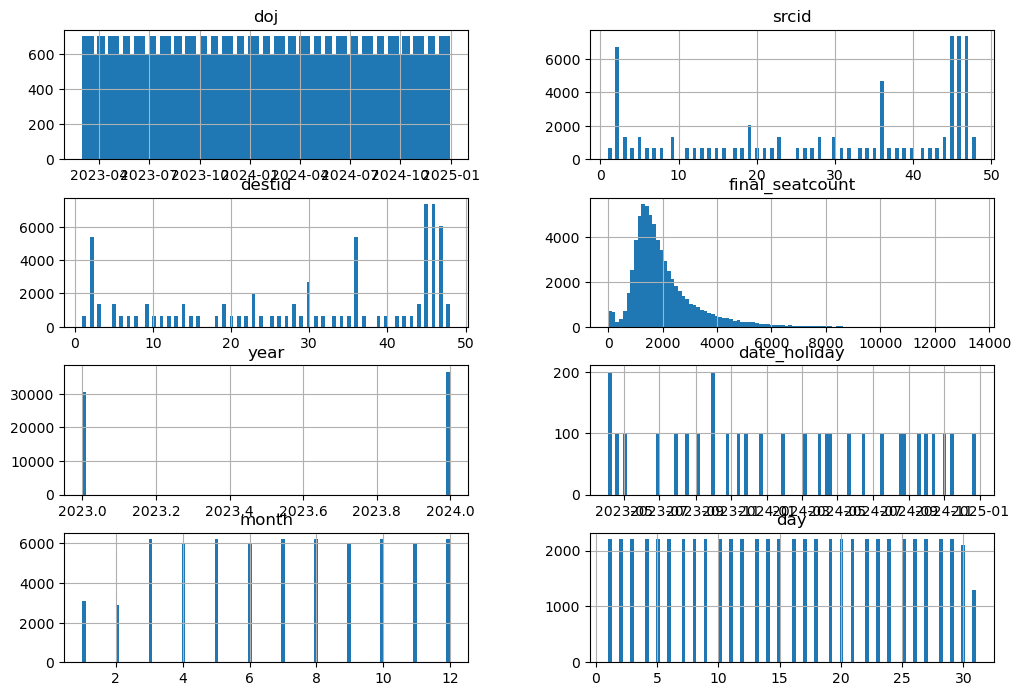

In [56]:
train_combined.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

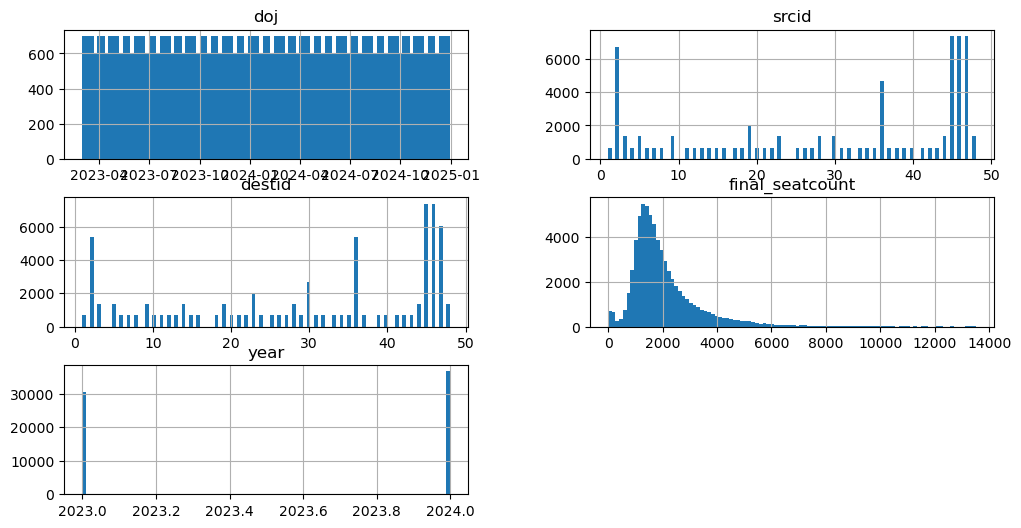

In [57]:
train.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [37]:
# Keep only rows related to holidays and weekends
filtered_df = train_combined[
    train_combined['holiday_proximity_label'].str.startswith('Holiday') |
    train_combined['holiday_proximity_label'].str.contains('_days_before') |
    train_combined['holiday_proximity_label'].str.contains('_days_after') |
    (train_combined['holiday_proximity_label'] == 'Weekend') |
    train_combined['holiday_proximity_label'].str.contains('day_after_weekend') |
    train_combined['holiday_proximity_label'].str.contains('day_before_weekend')
]


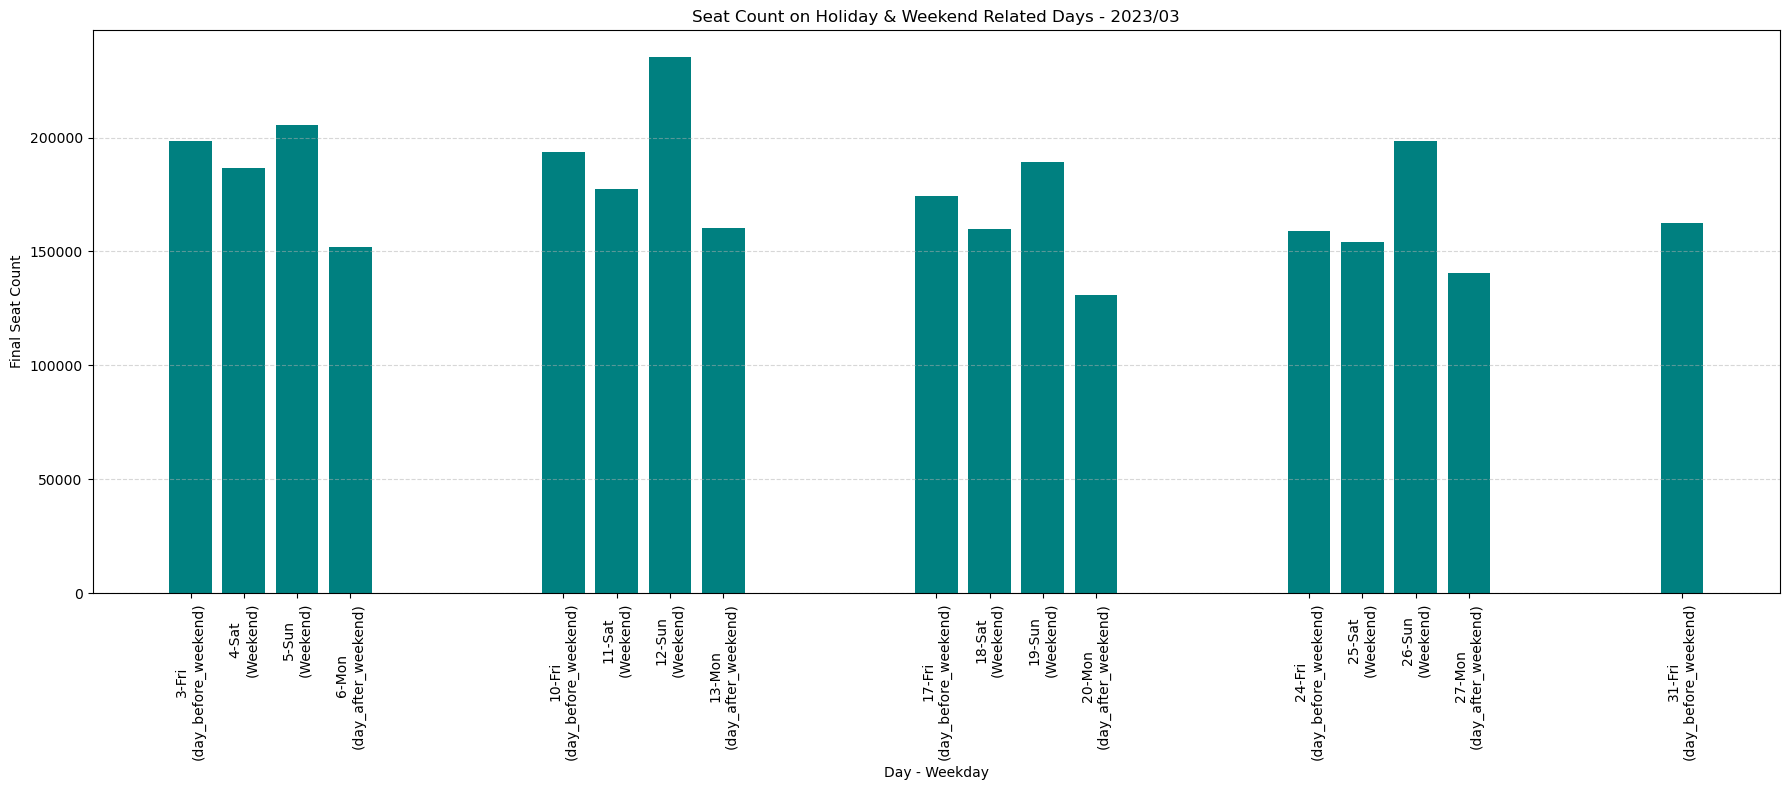

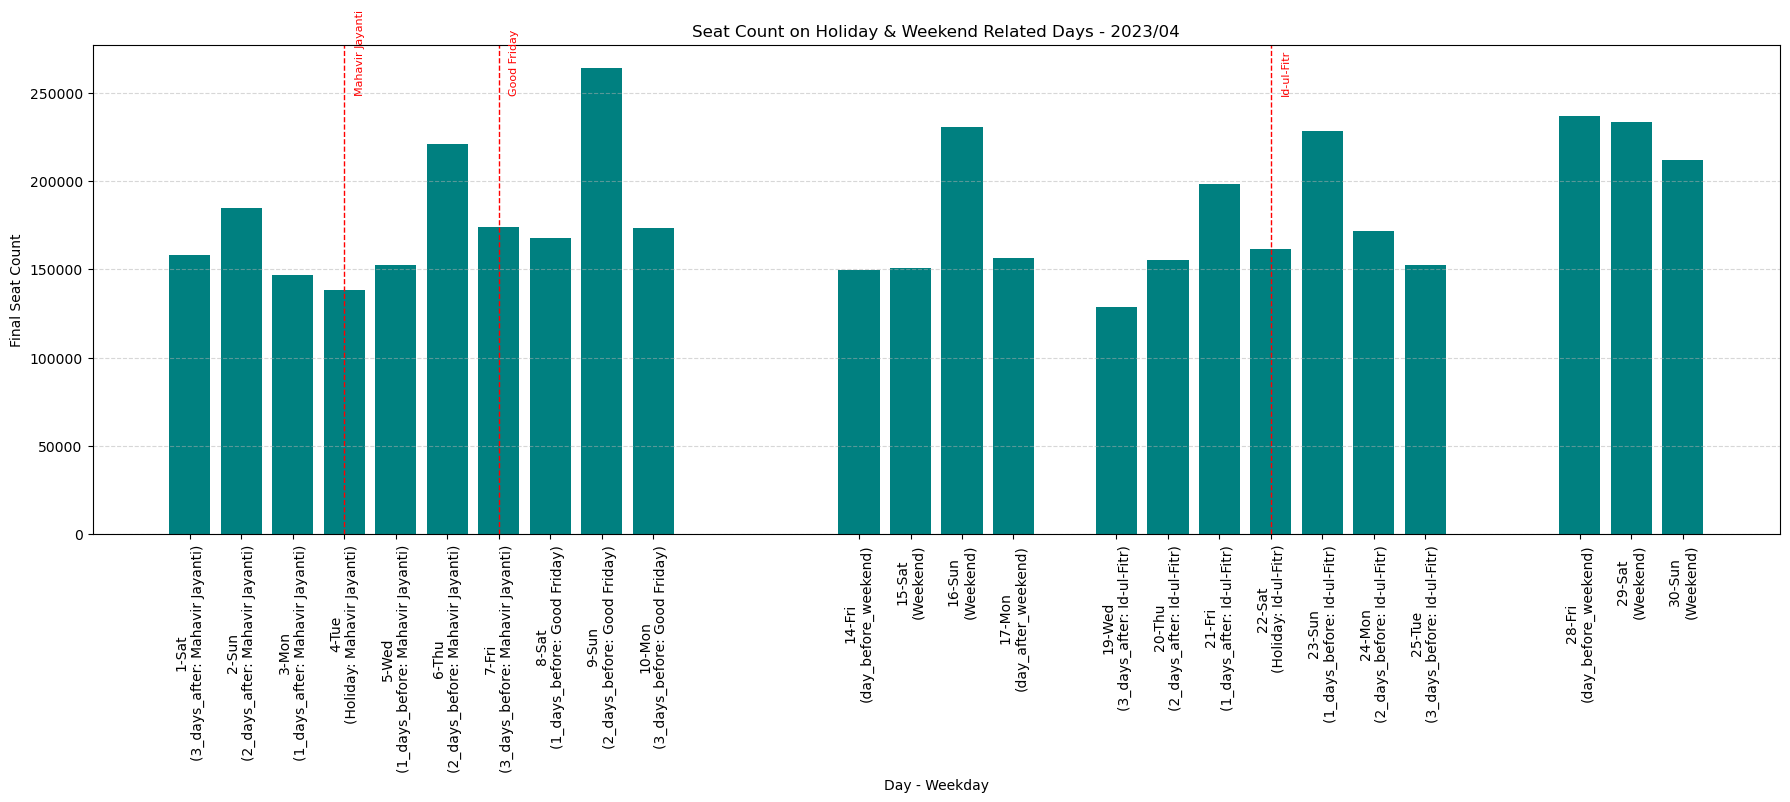

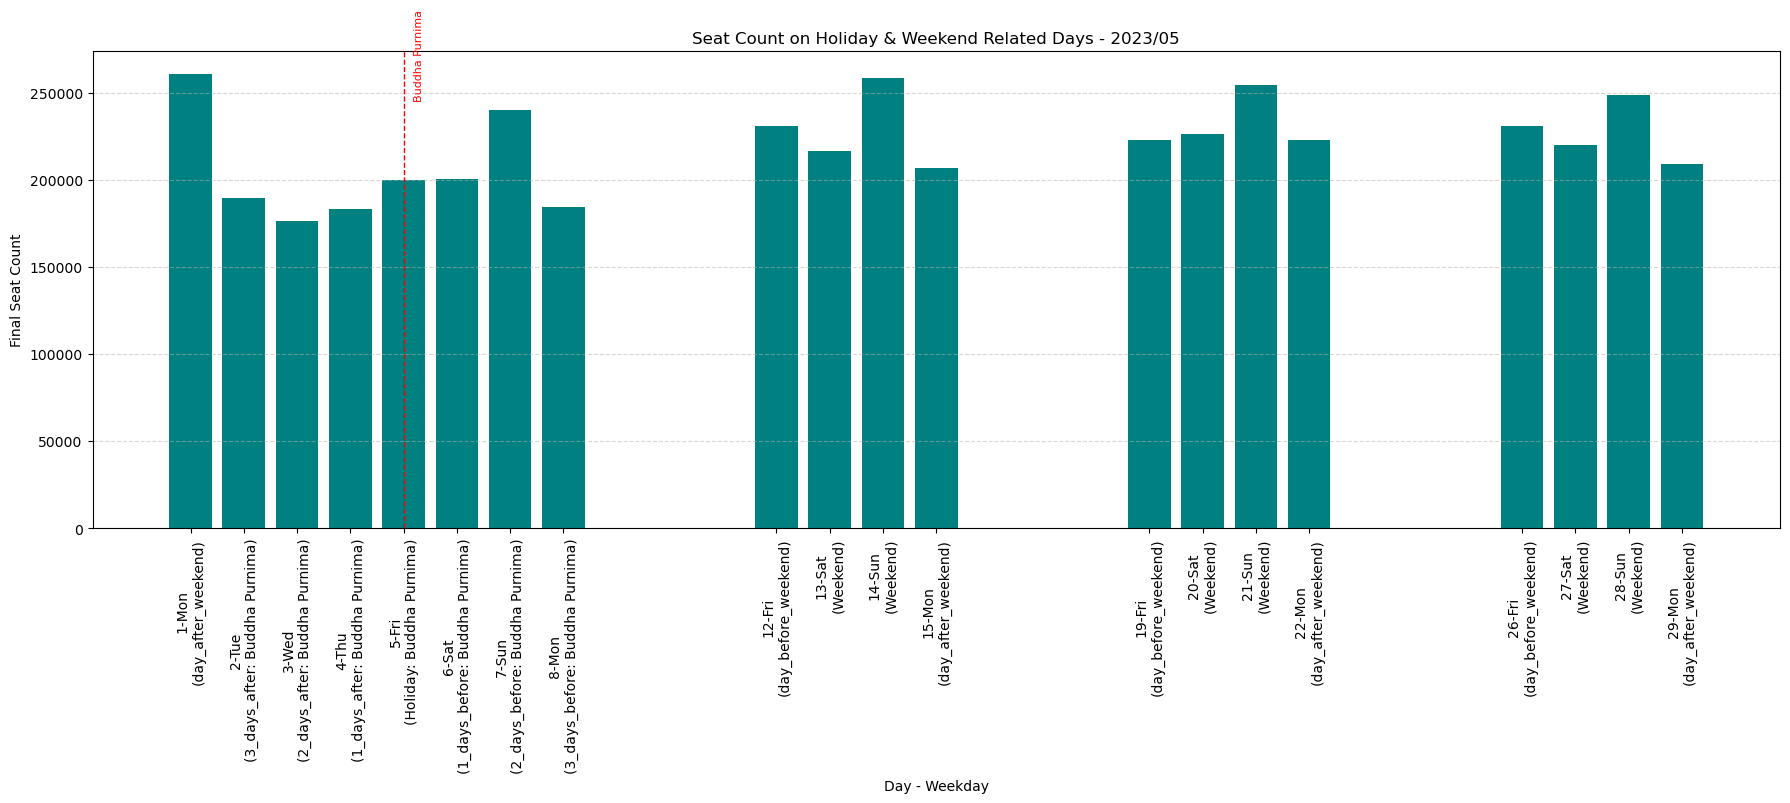

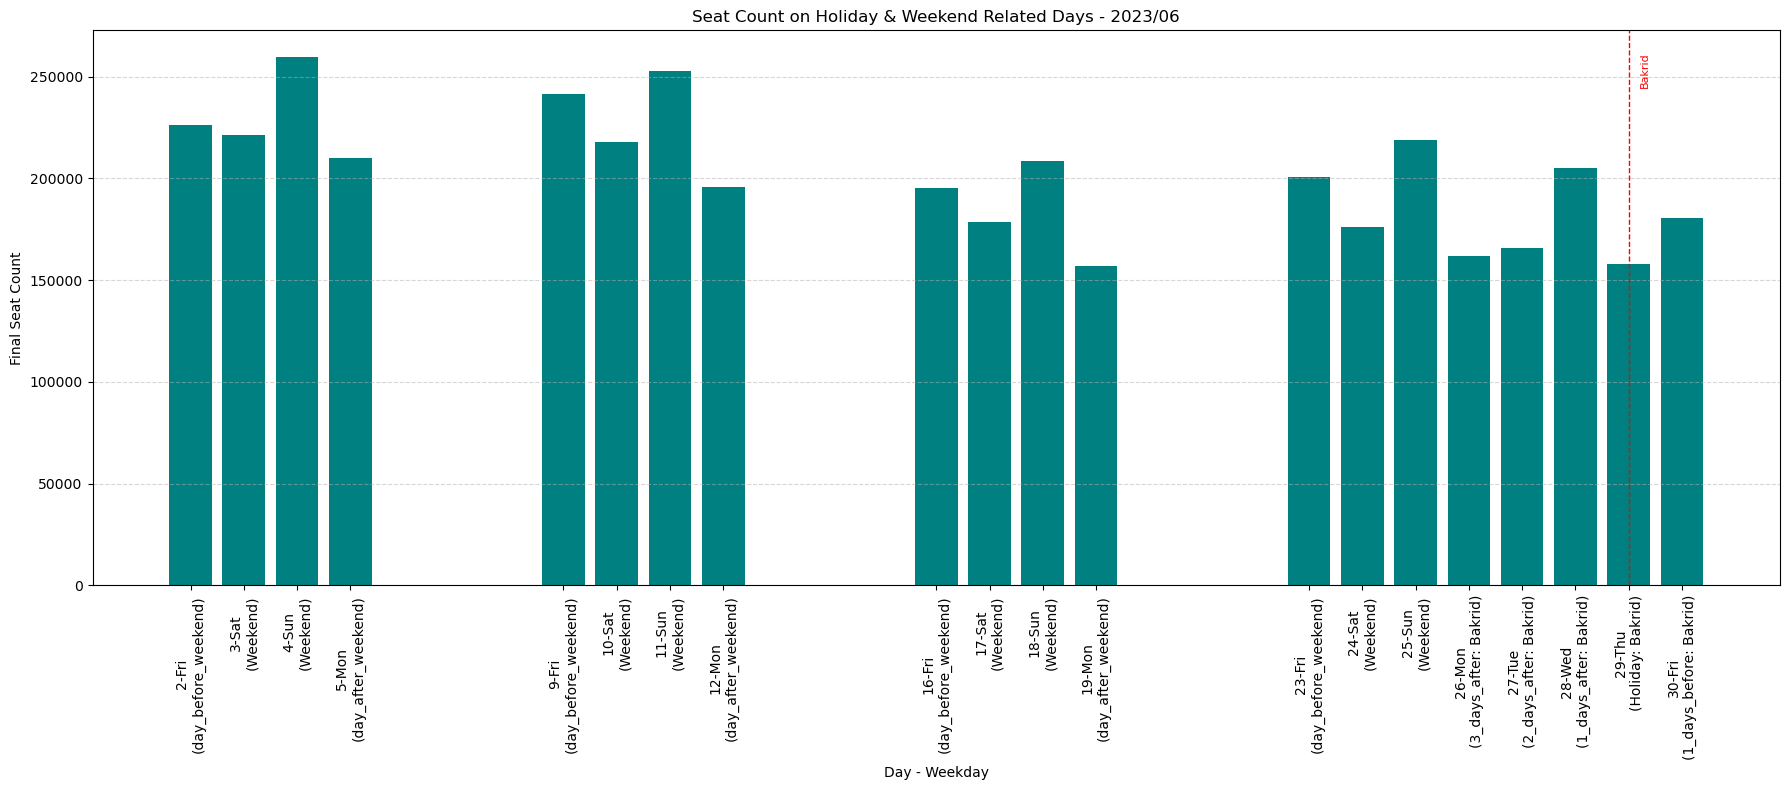

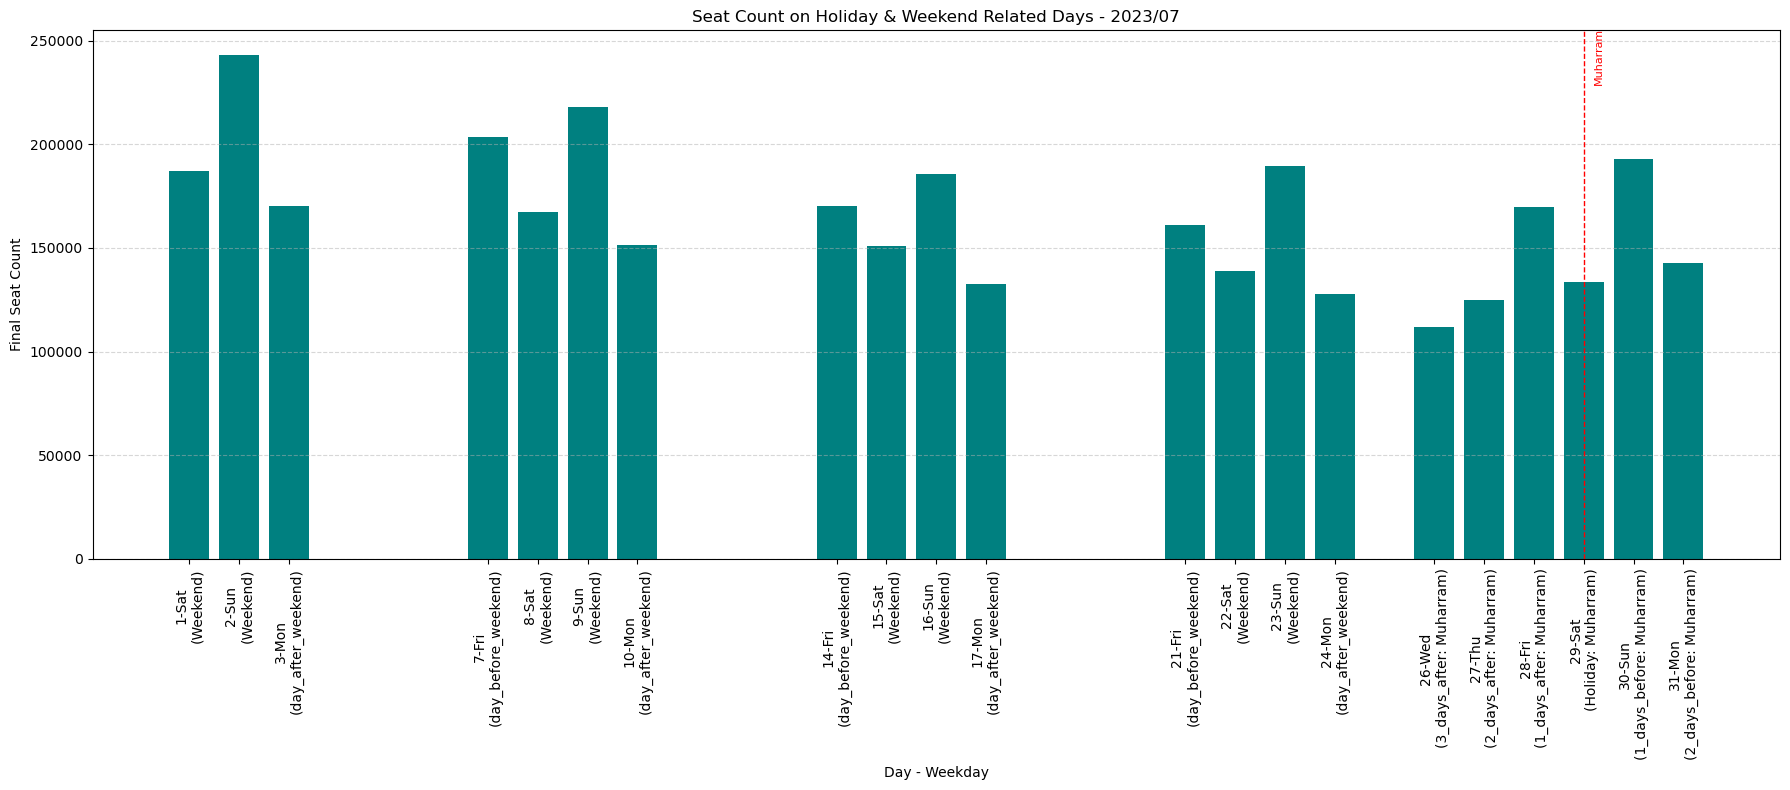

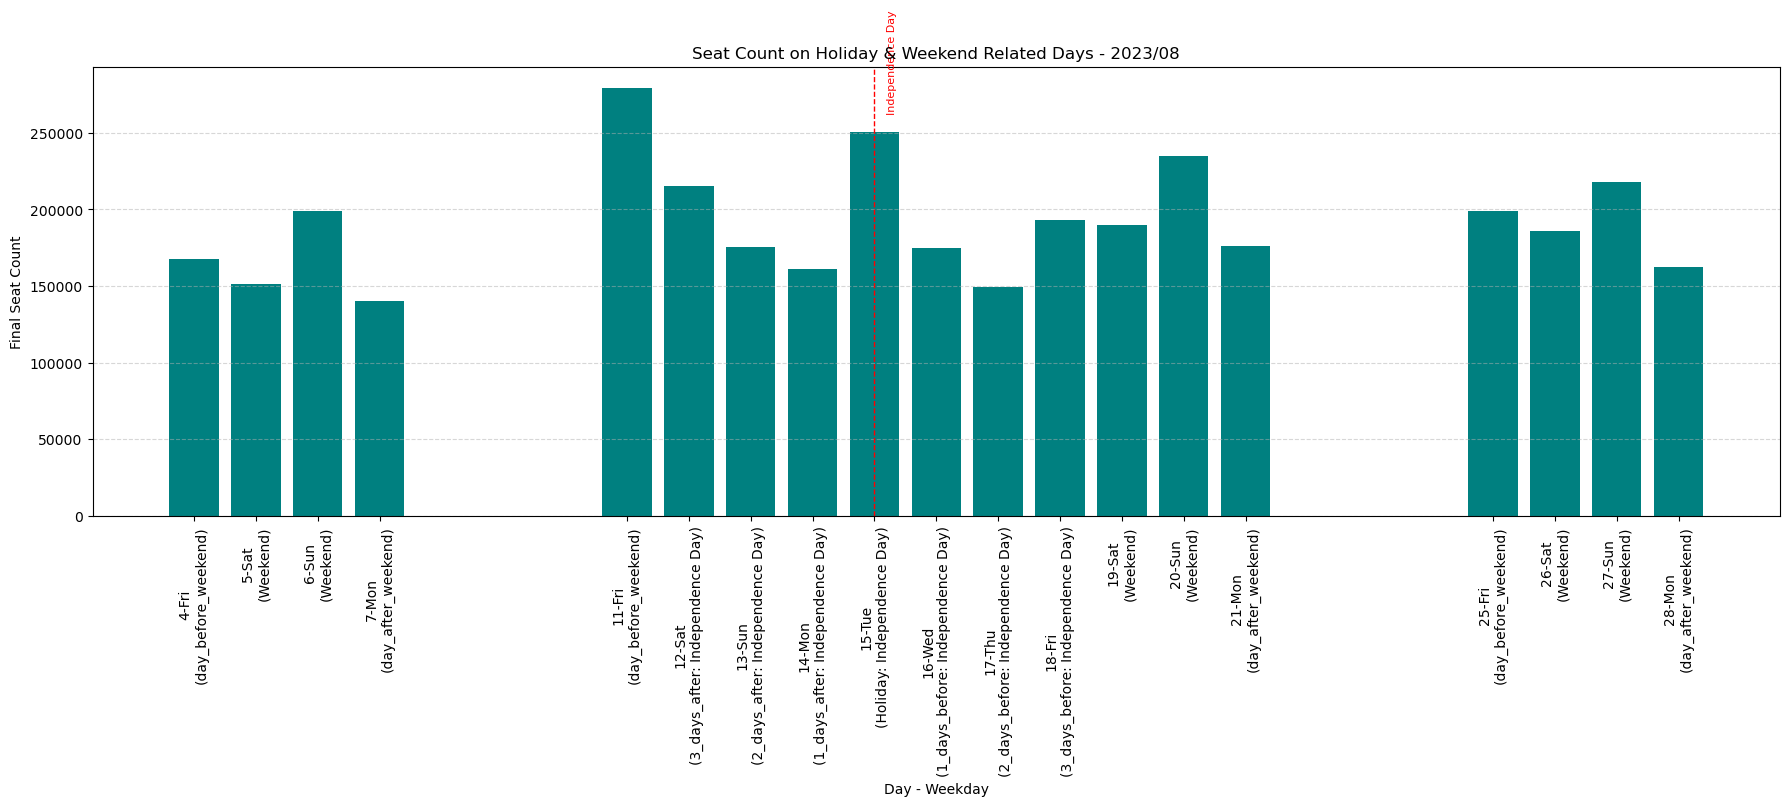

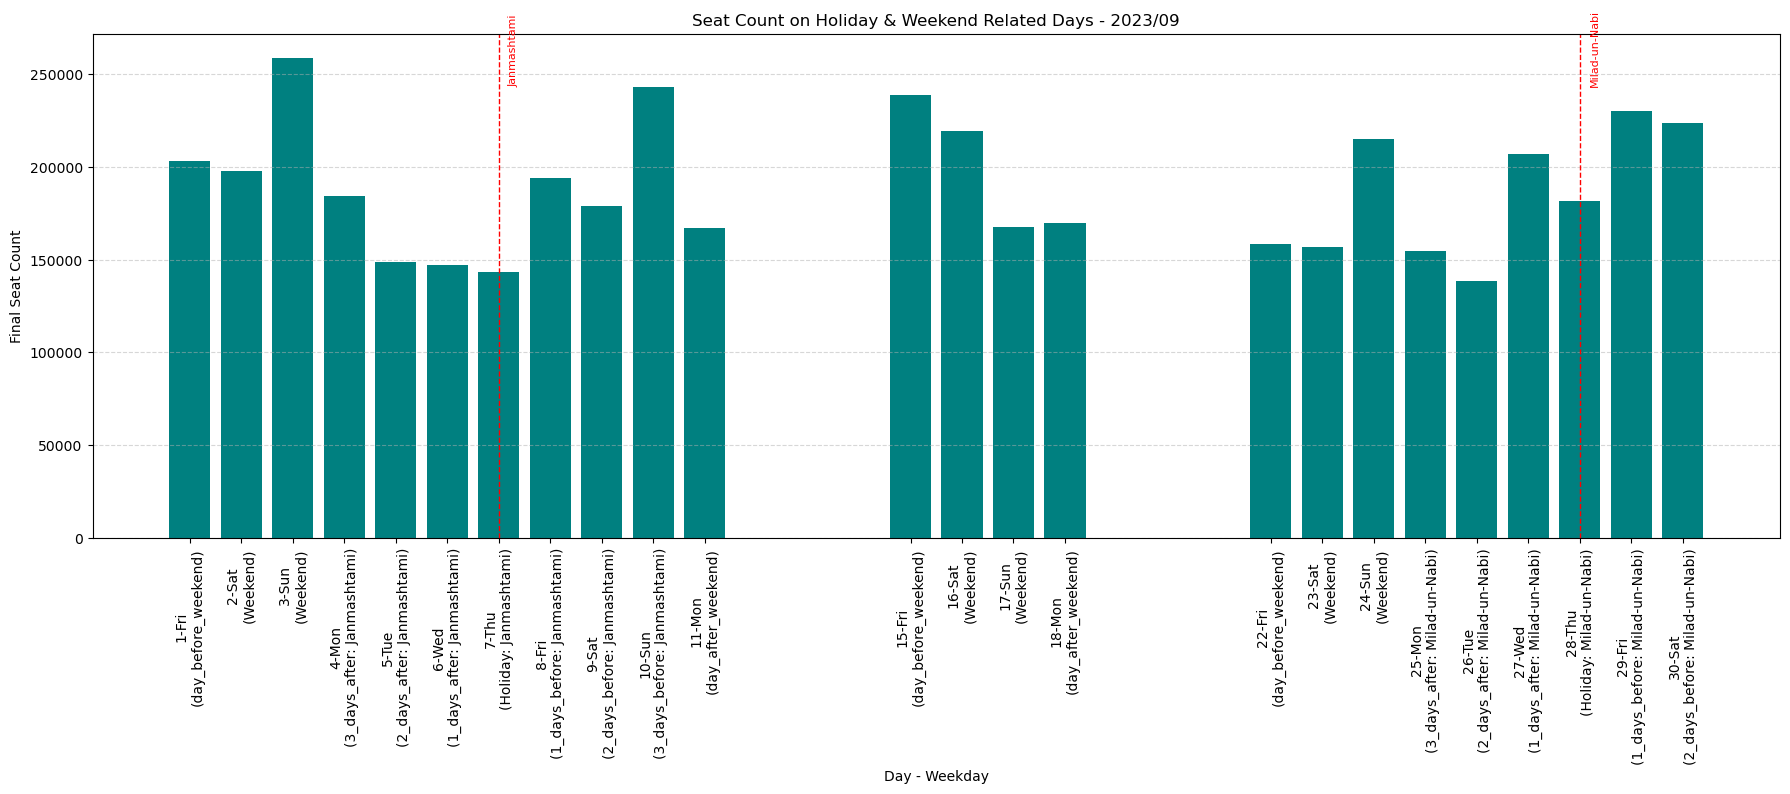

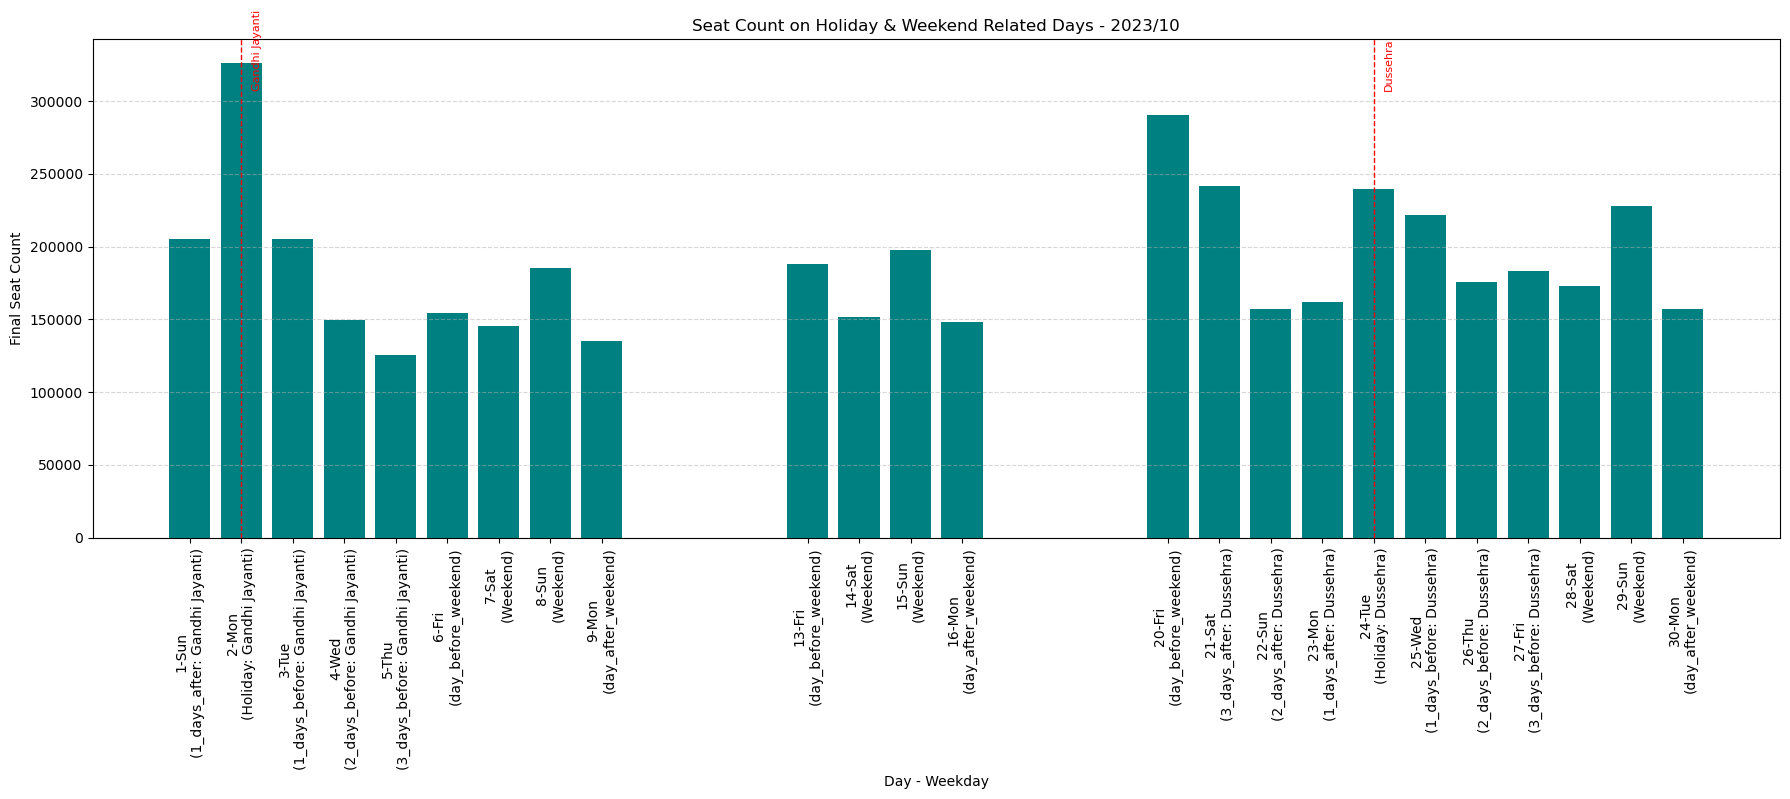

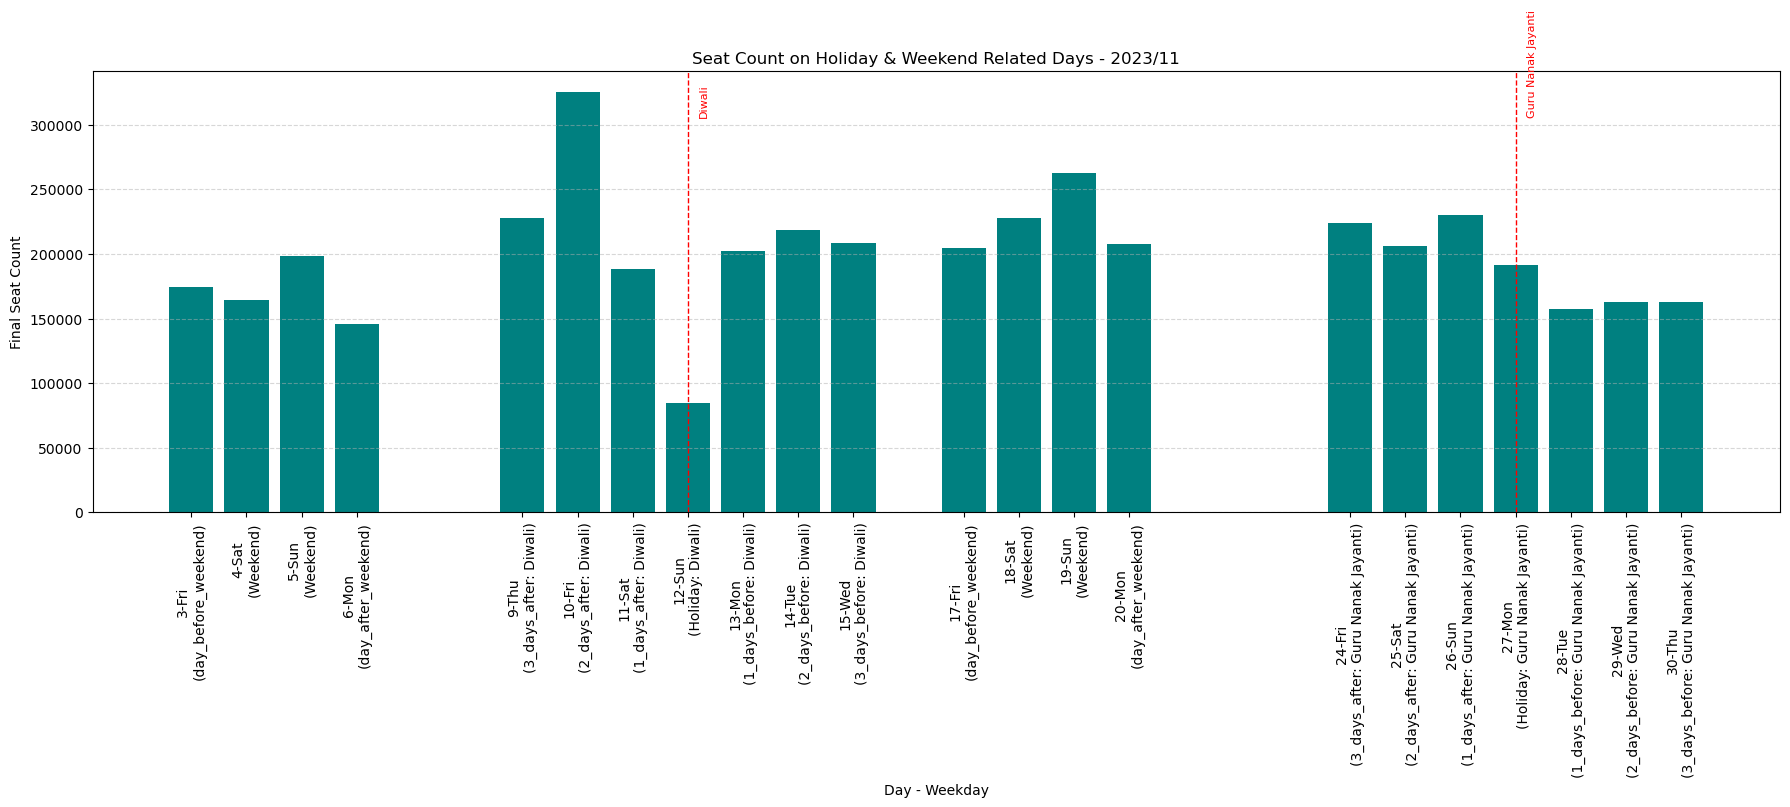

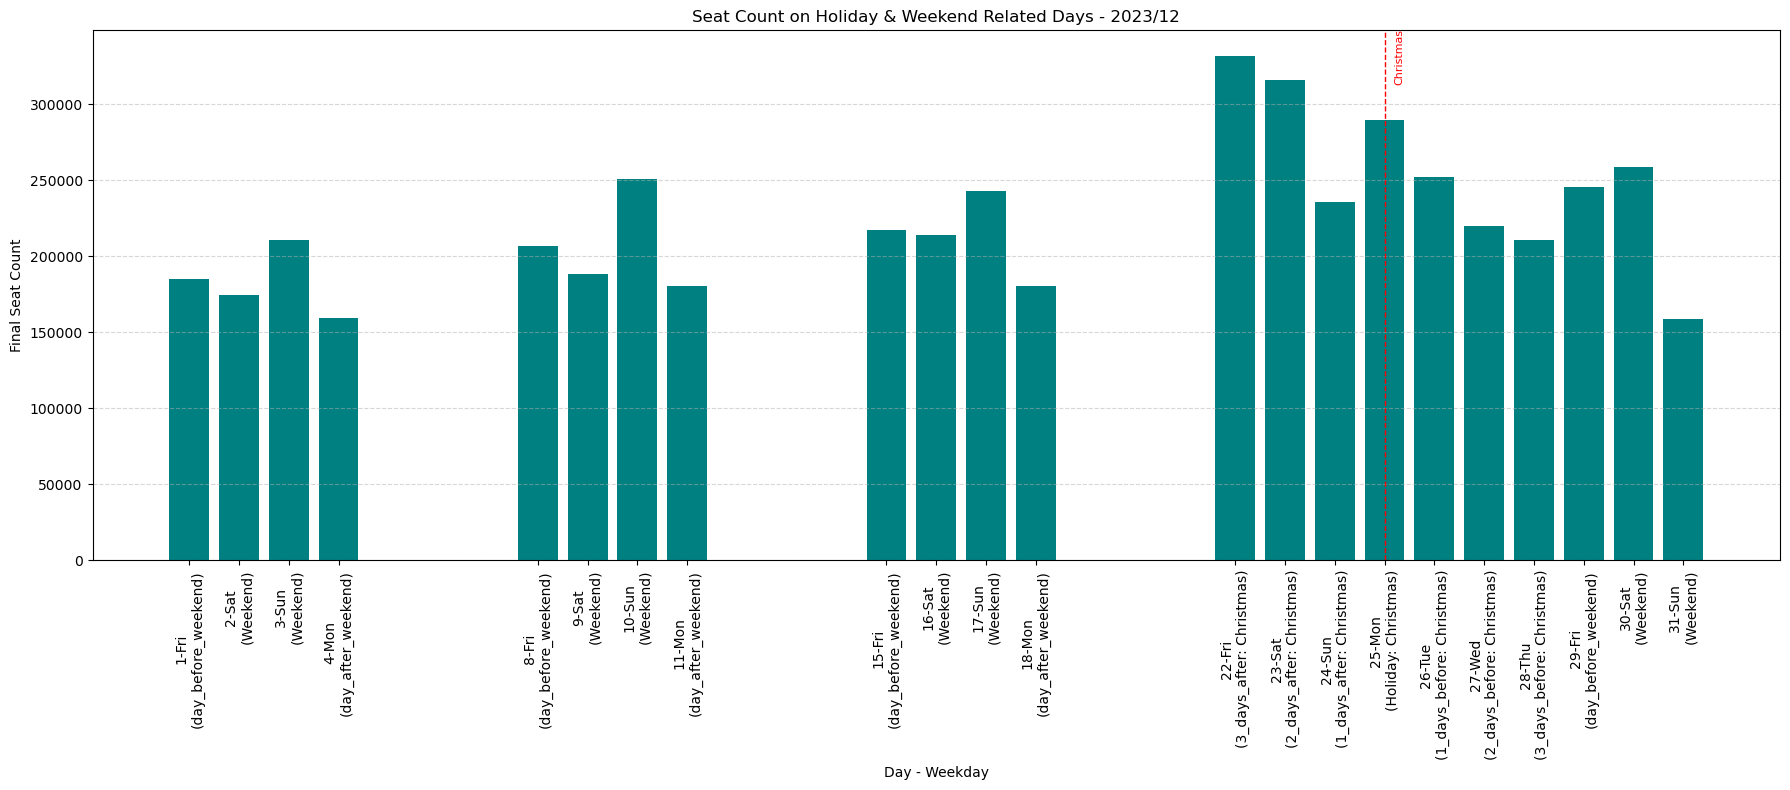

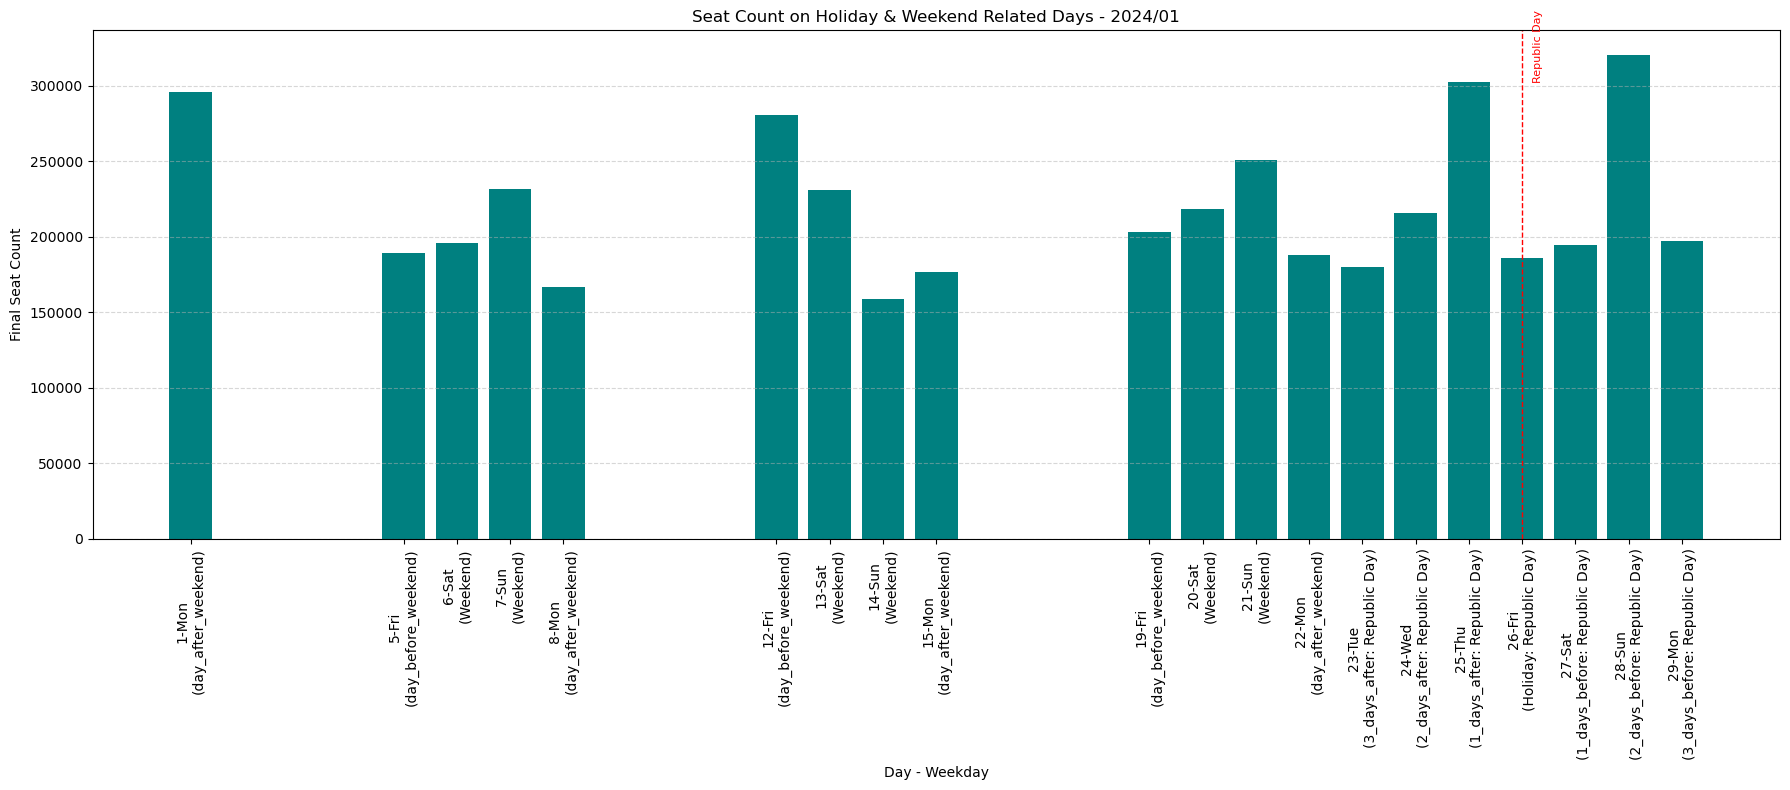

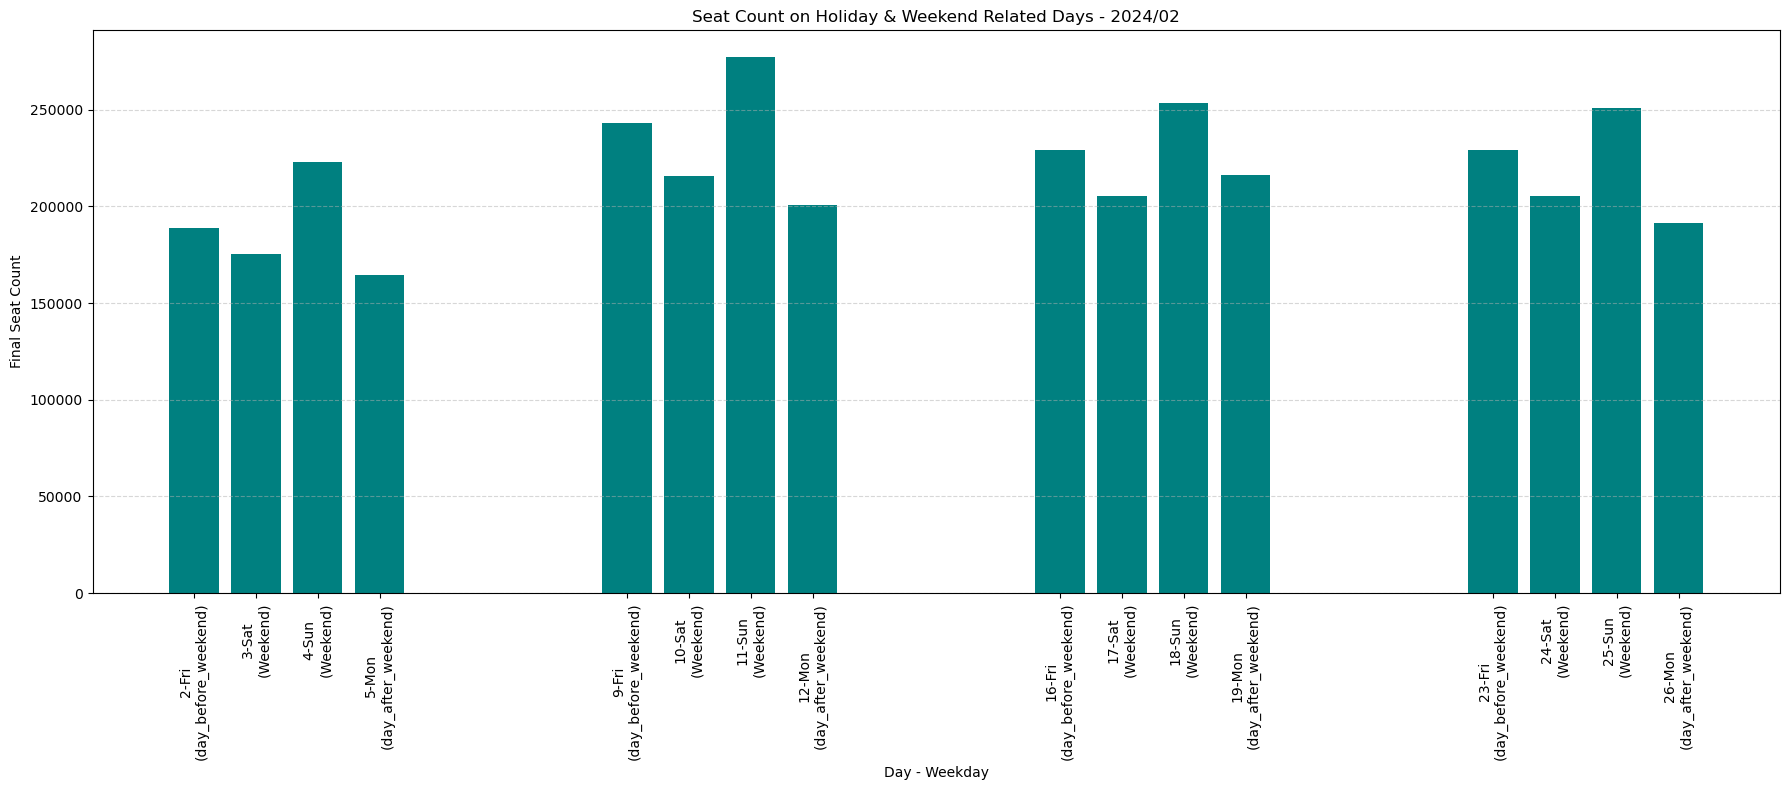

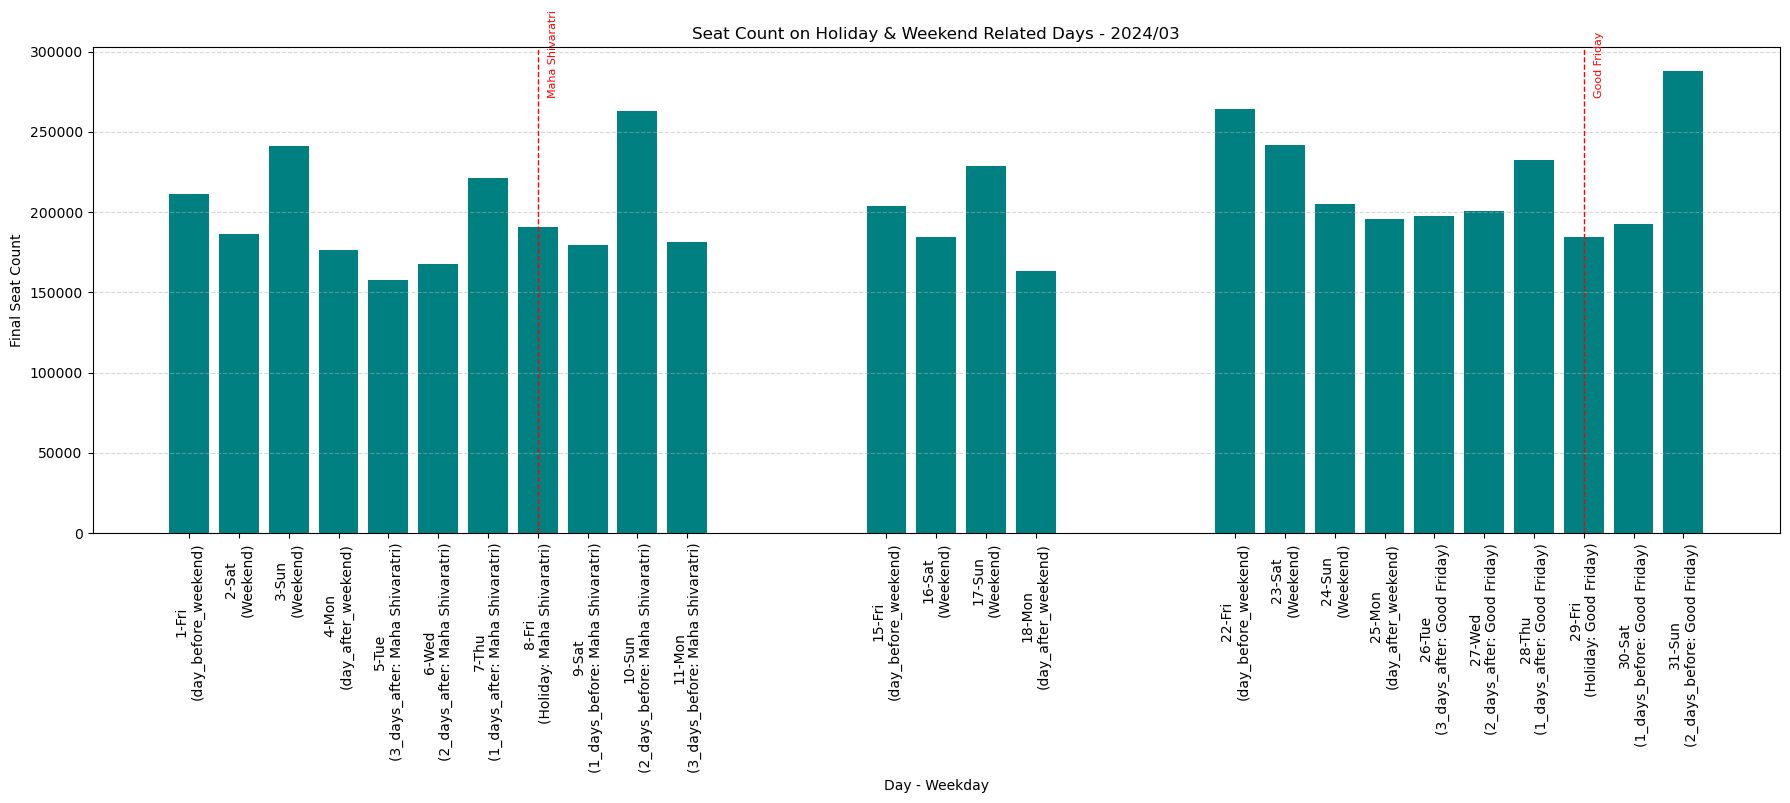

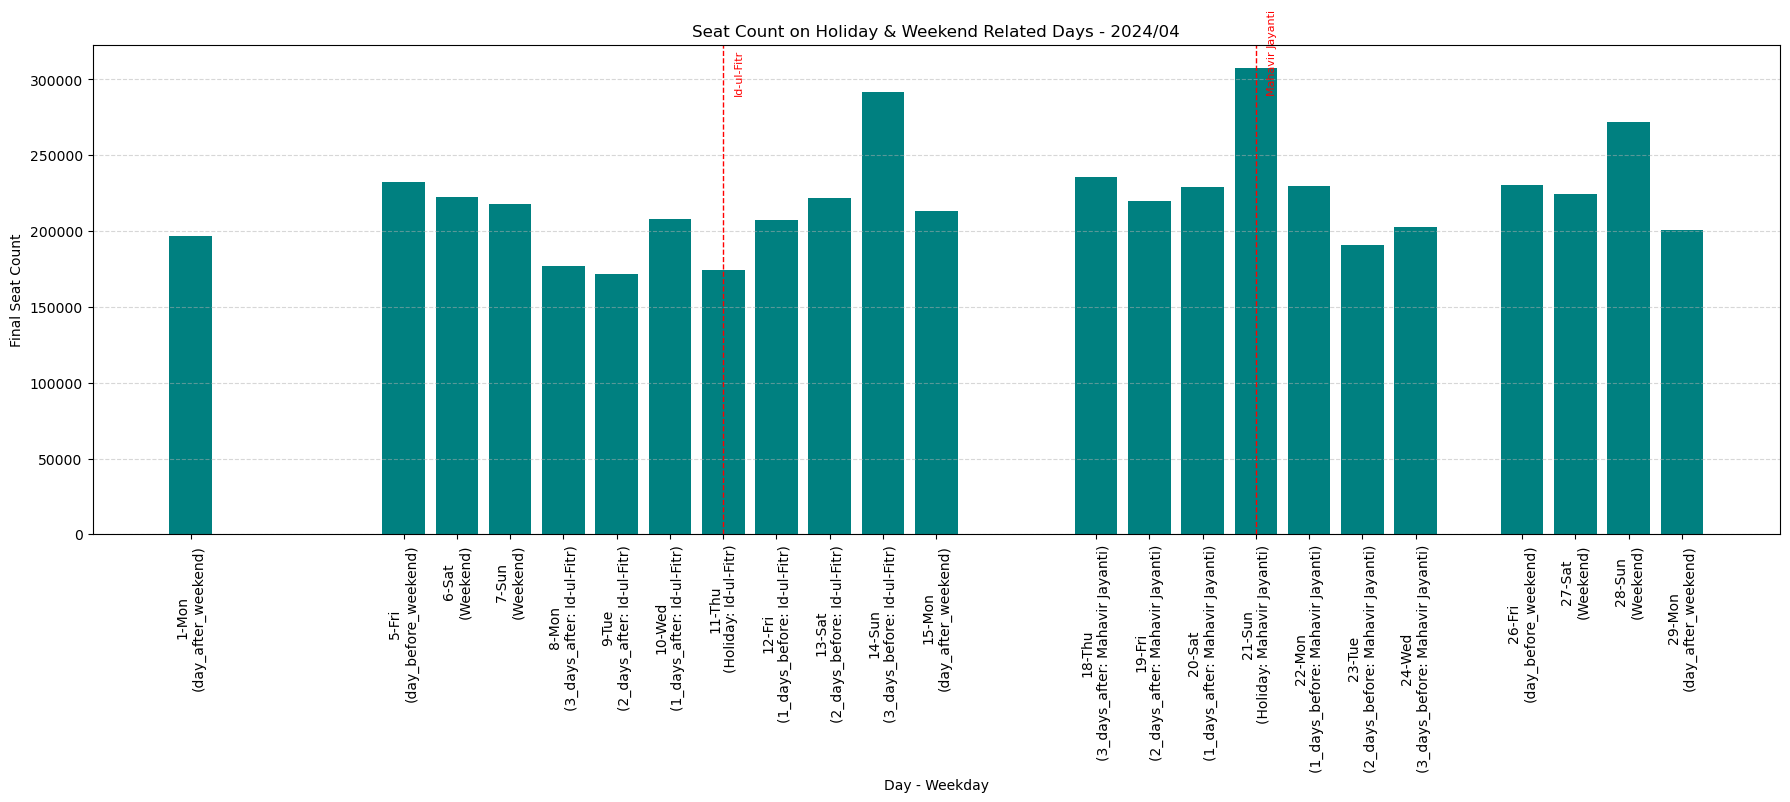

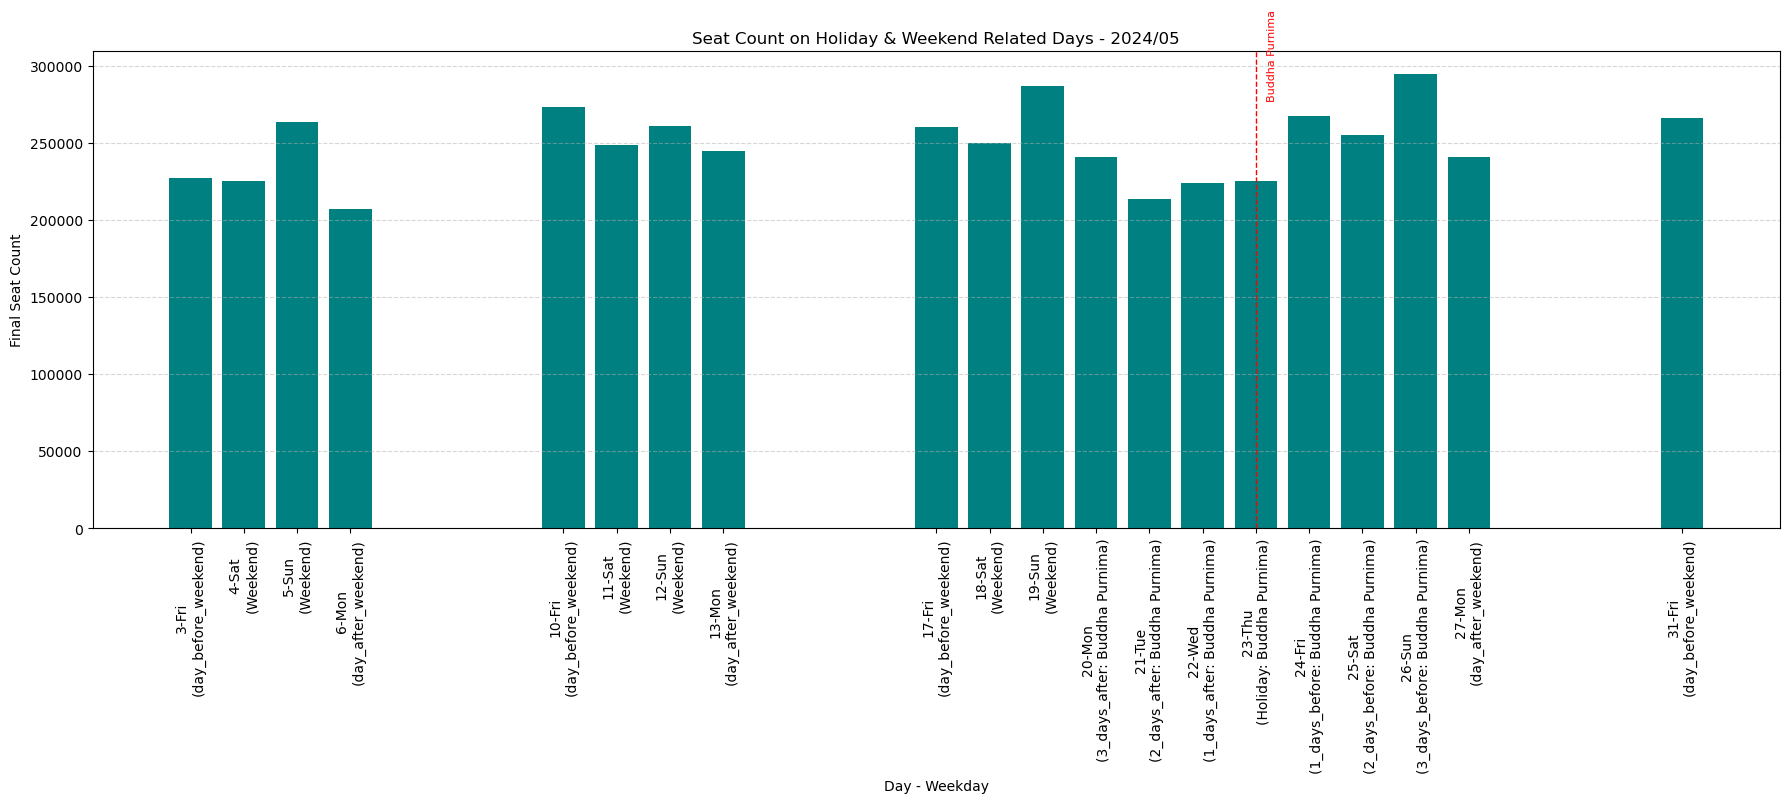

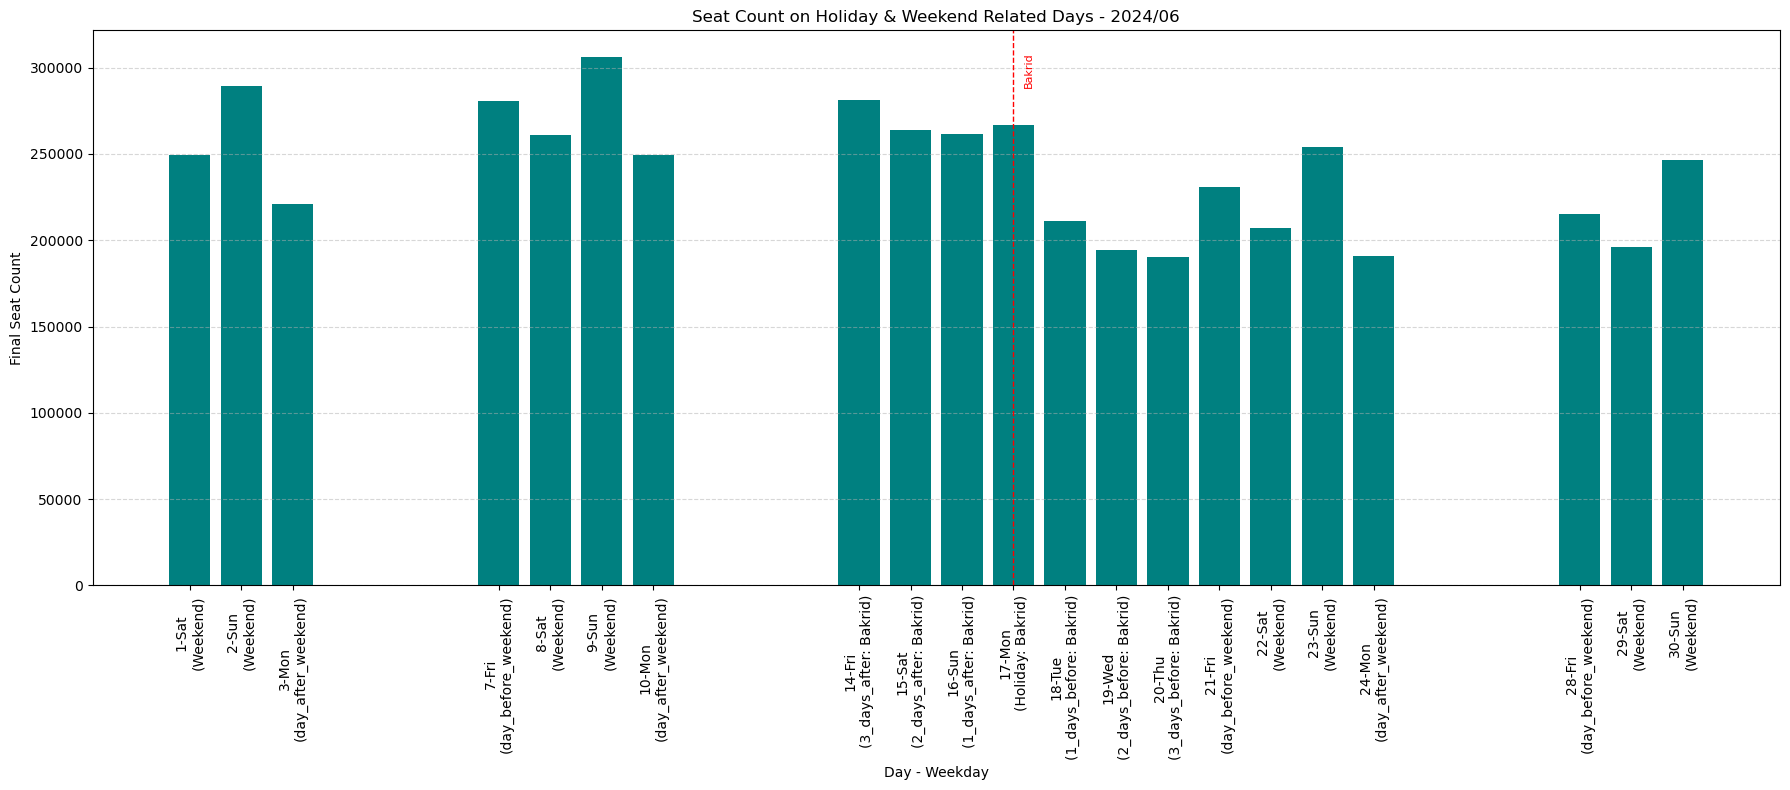

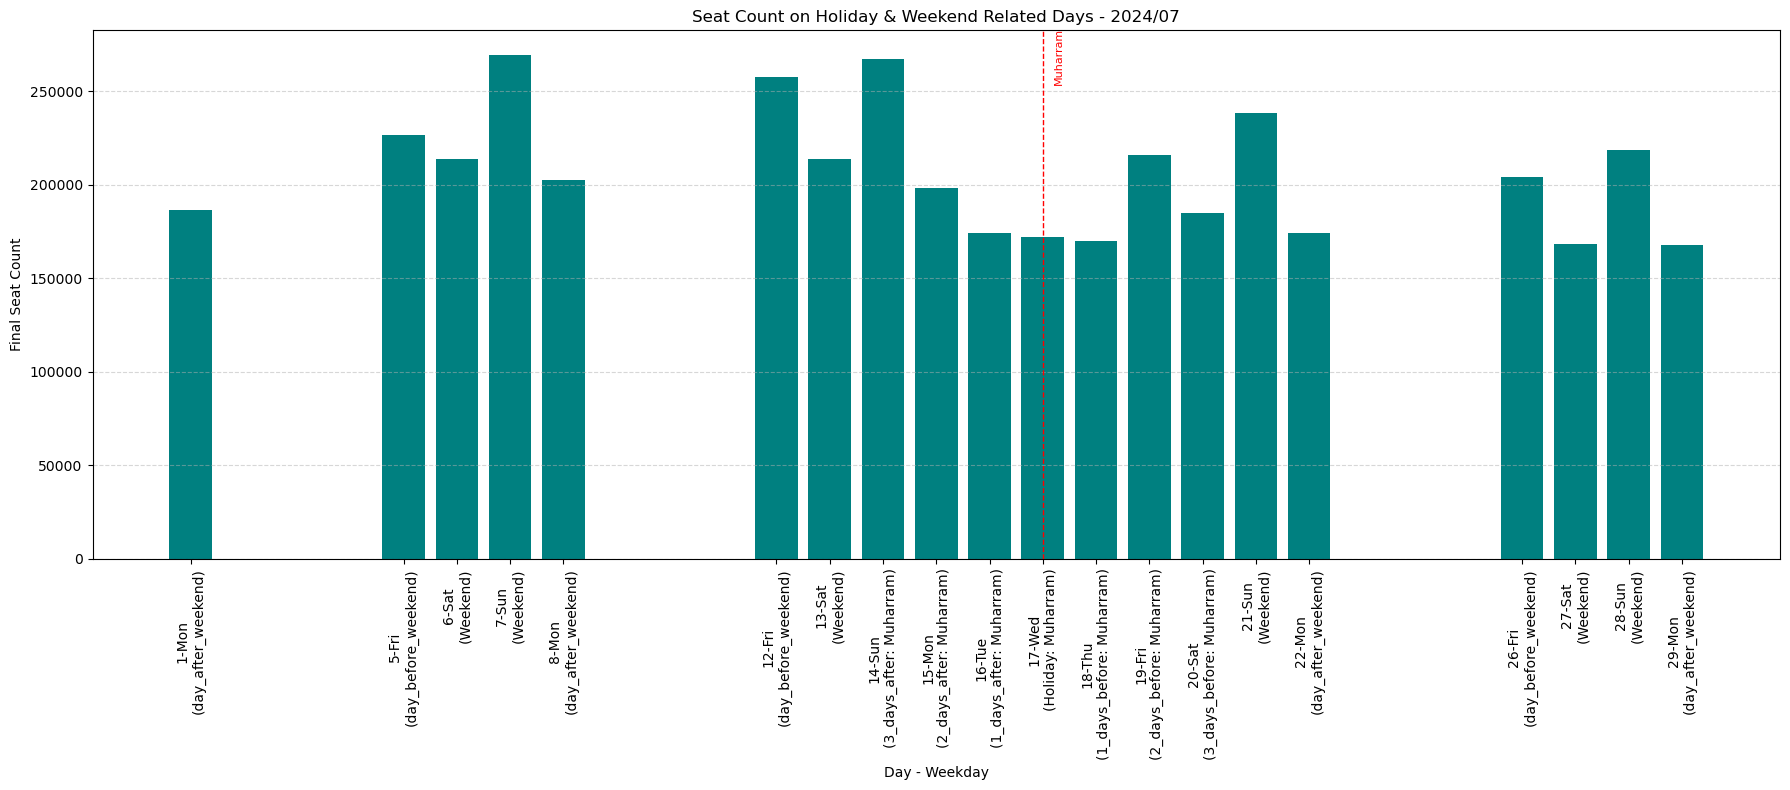

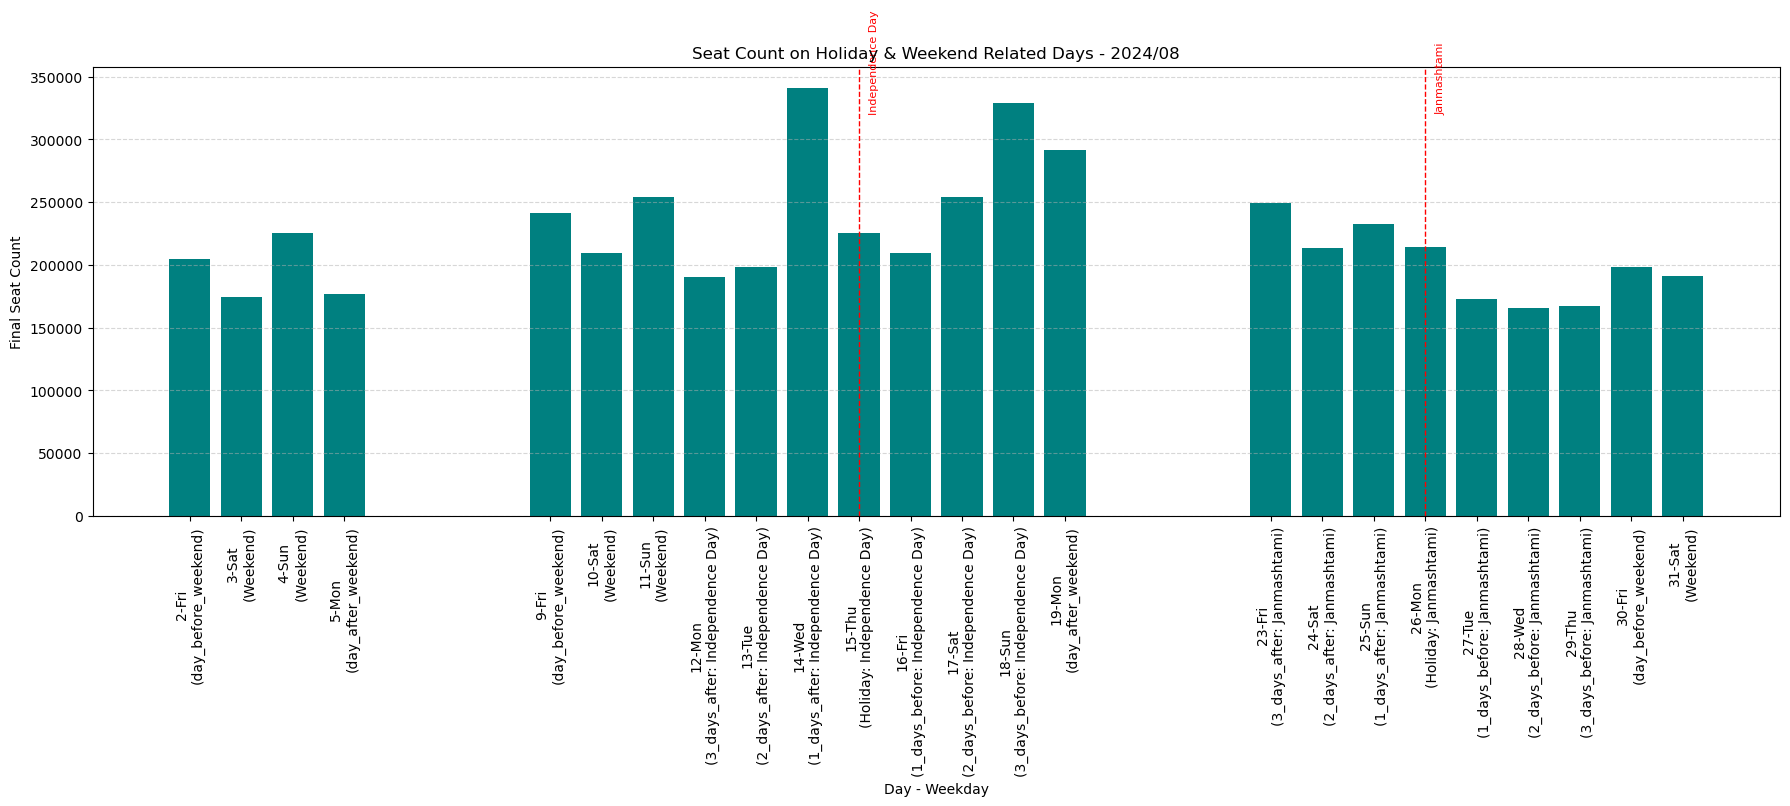

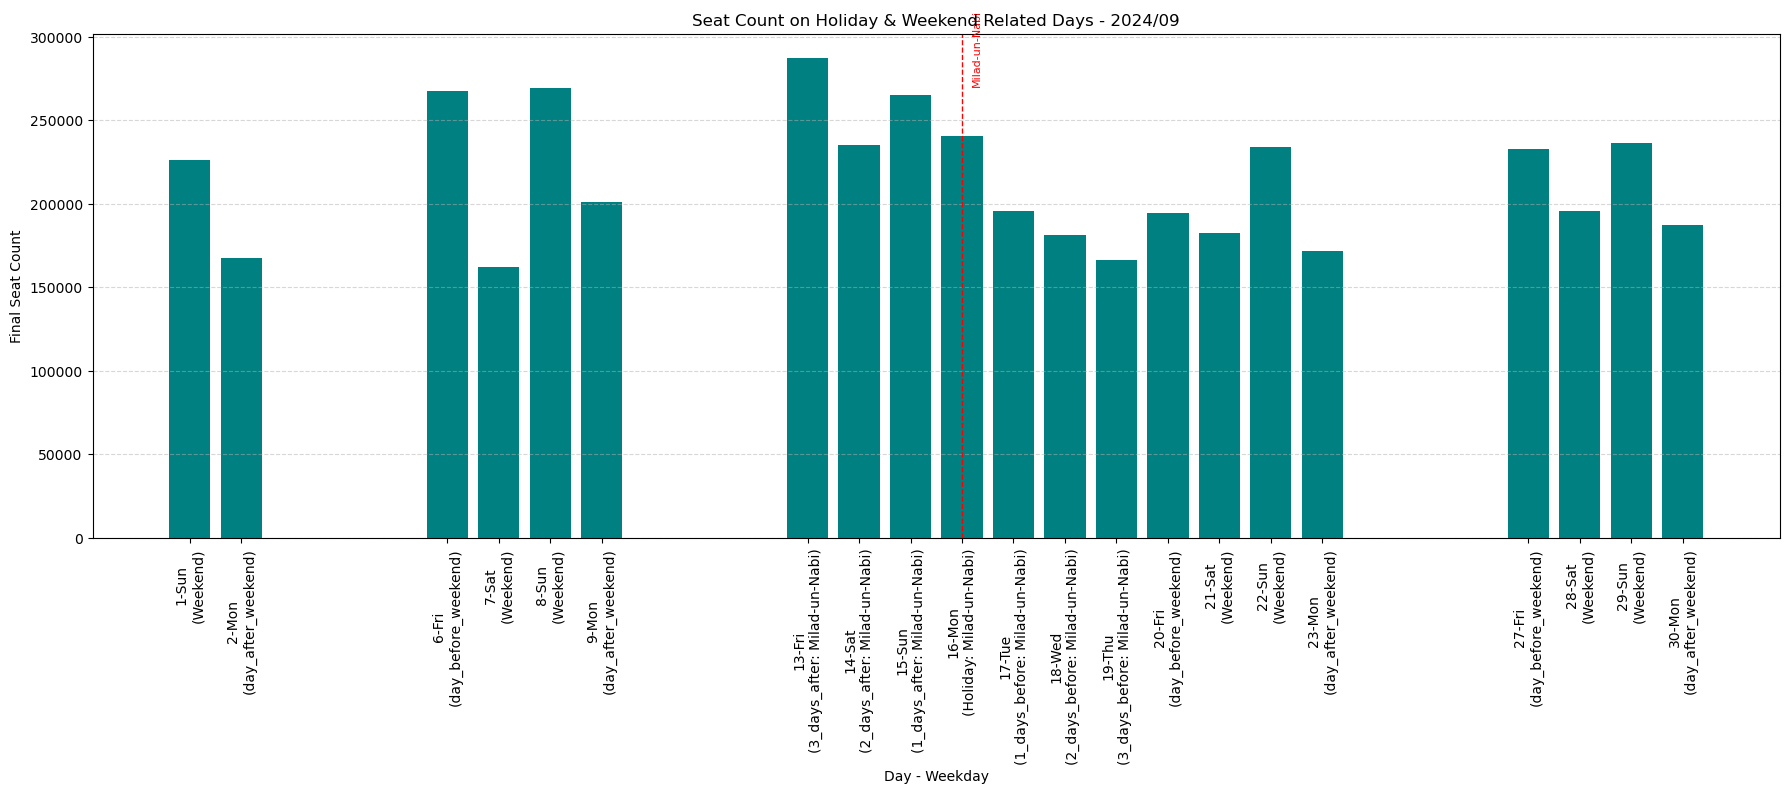

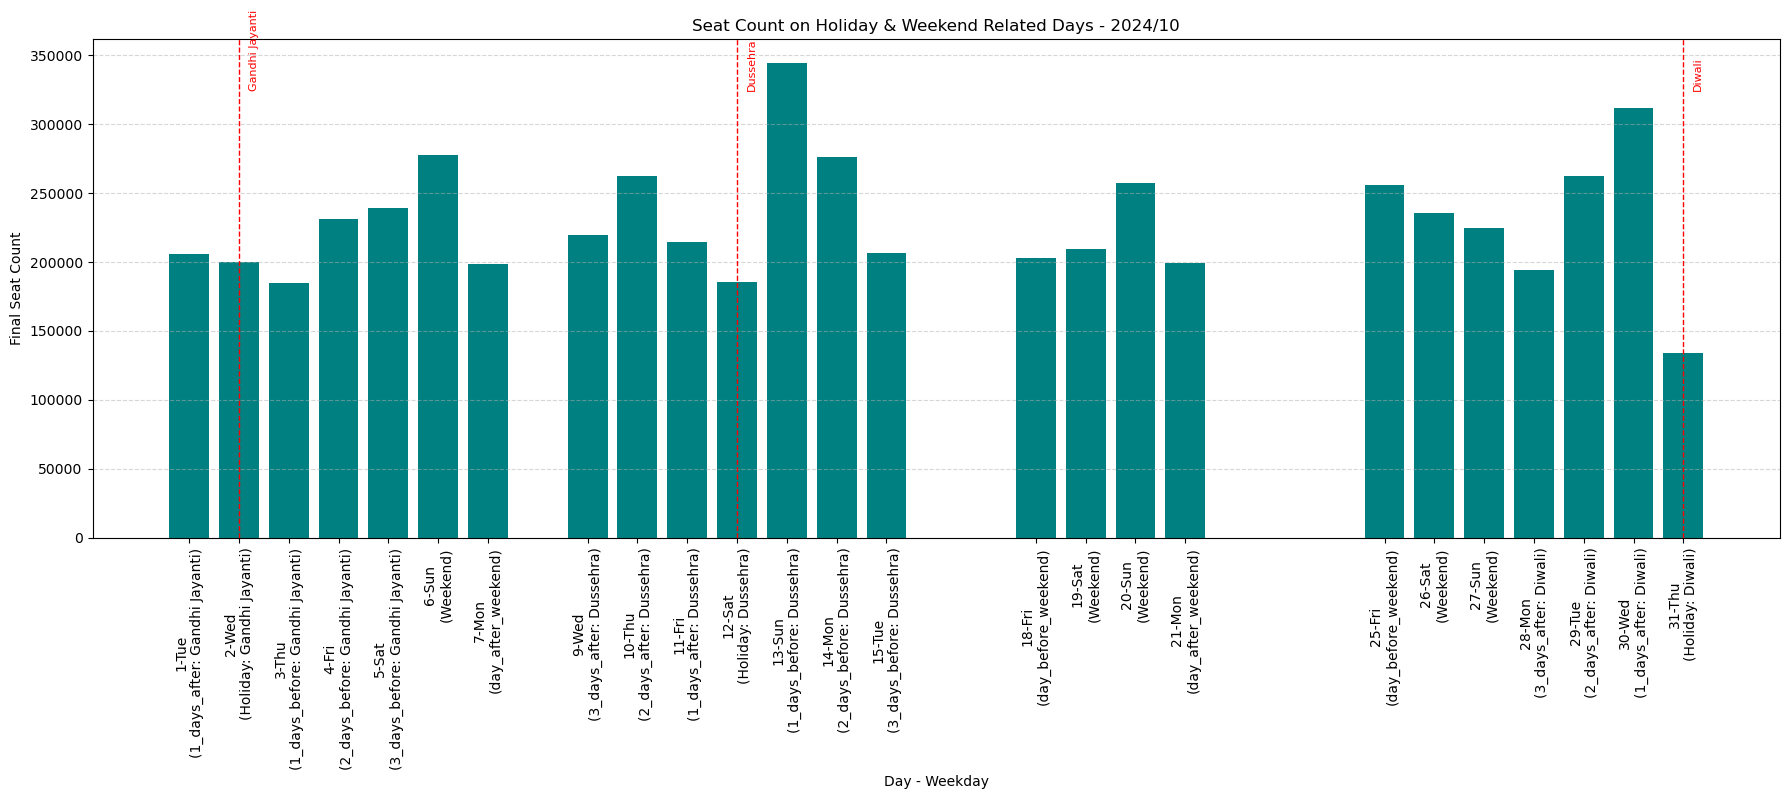

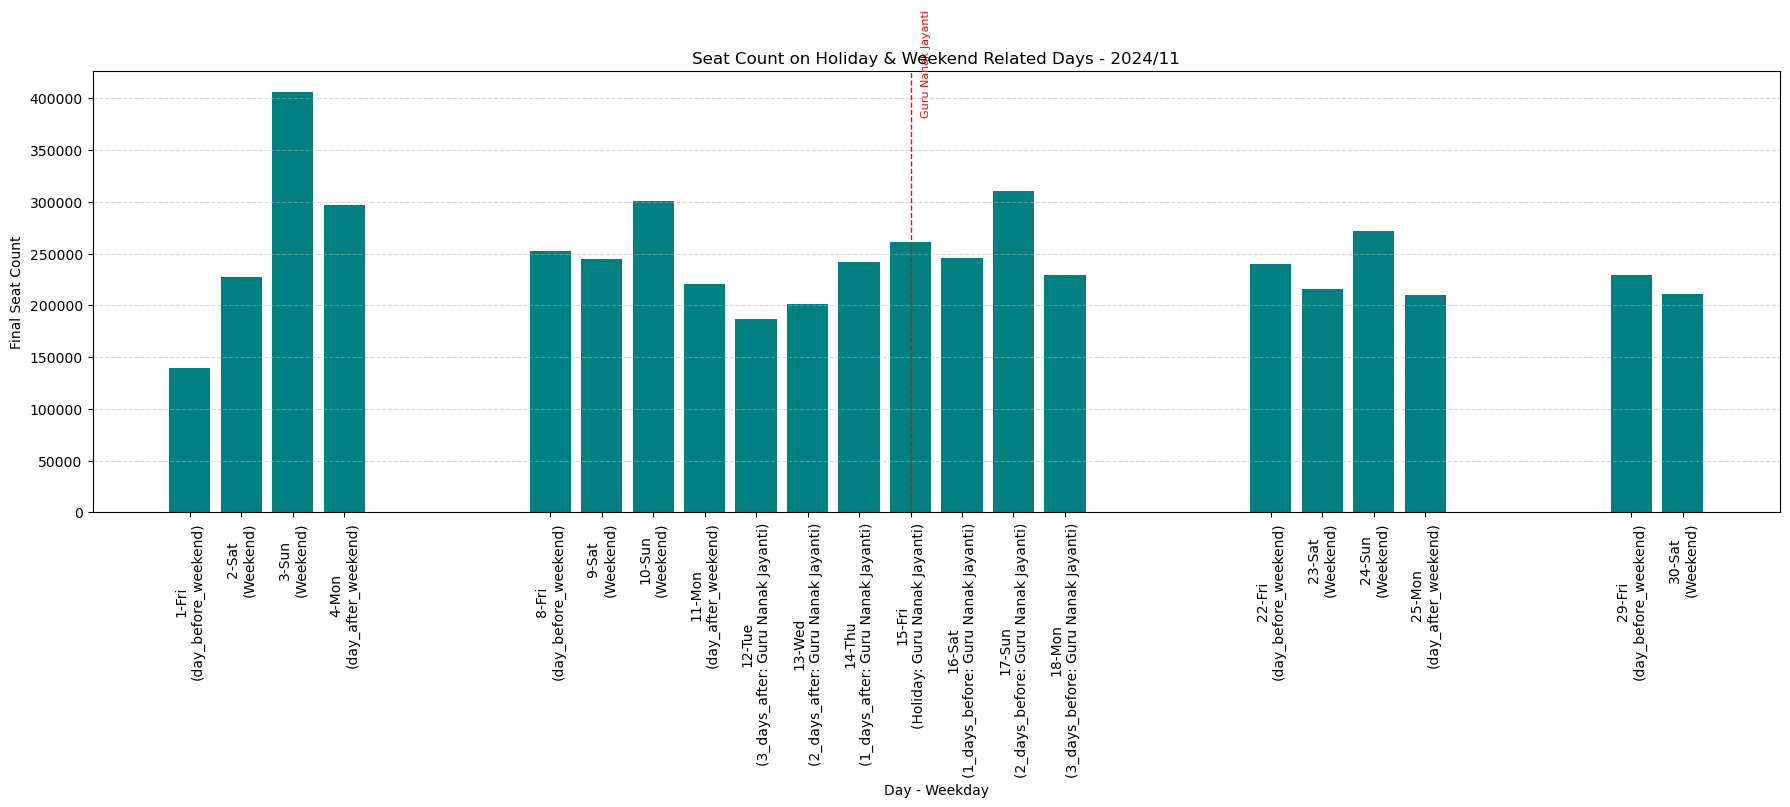

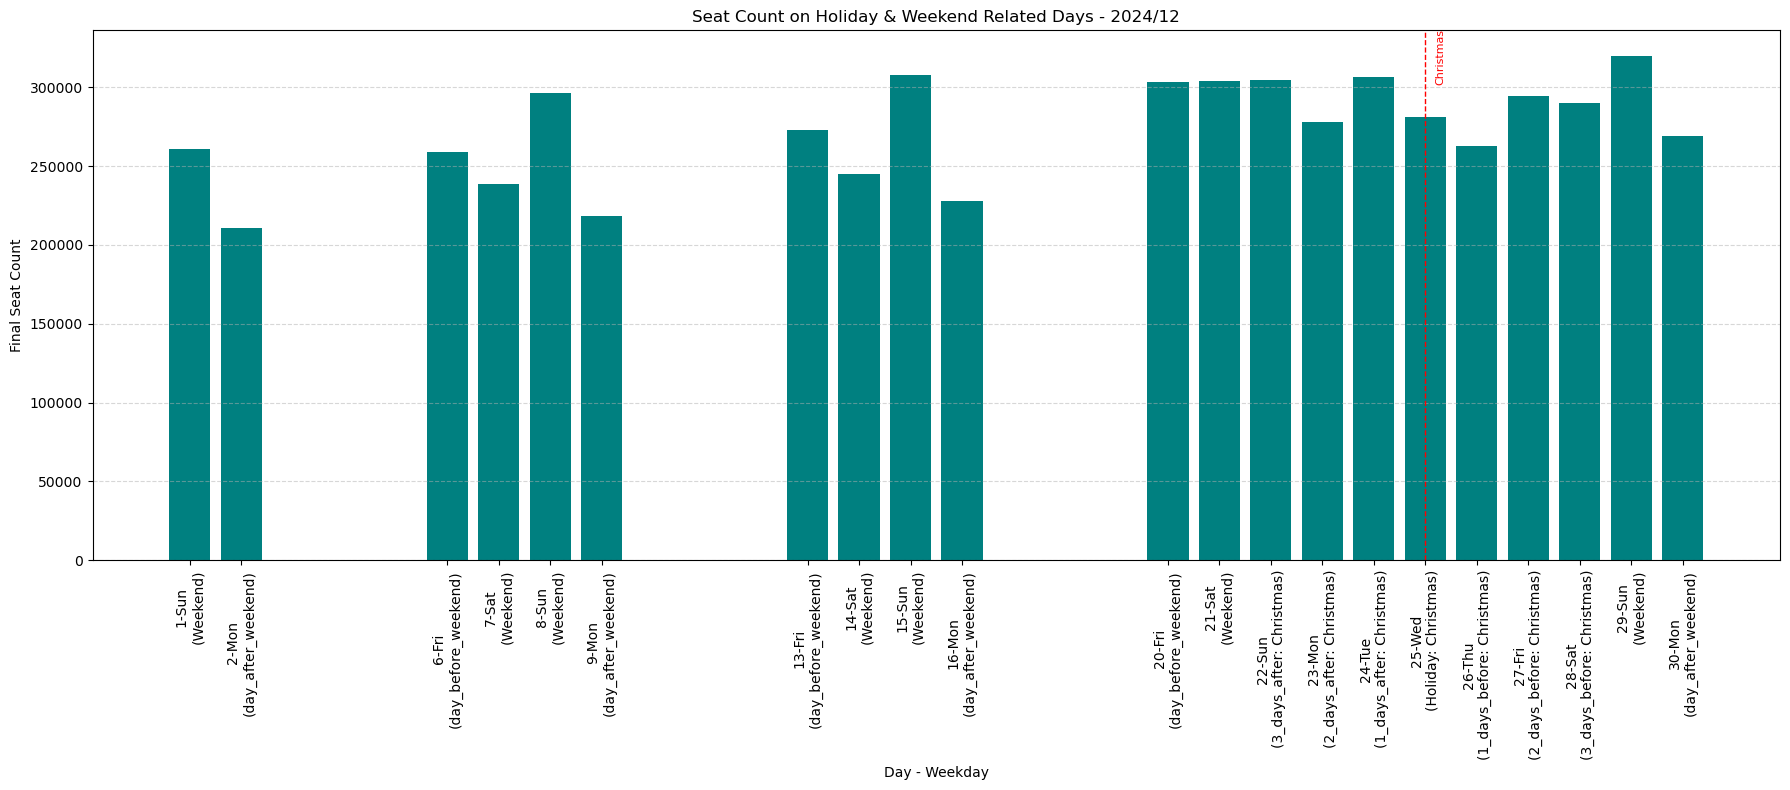

In [51]:
for year in filtered_df['year'].unique():
    yearly_df = filtered_df[filtered_df['year'] == year]
    
    for month in range(1, 13):
        month_df = yearly_df[yearly_df['month'] == month]
        
        if month_df.empty:
            continue

        # Group by day and weekday
        daywise = month_df.groupby(['day', 'weekday_name'])['final_seatcount'].sum().reset_index()

        label_df = (
            month_df.groupby('day')['holiday_proximity_label']
            .first()
            .reset_index()
        )
        daywise = pd.merge(daywise, label_df, on='day', how='left')
        
        holiday_df = (
            train_combined[
                (train_combined['year'] == year) &
                (train_combined['date_holiday'].dt.month == month)
            ][['date_holiday', 'holiday_name']]
            .drop_duplicates()
        )
        holiday_df['holiday_day'] = holiday_df['date_holiday'].dt.day

        # Plot
        plt.figure(figsize=(18, 8))
        plt.bar(daywise['day'], daywise['final_seatcount'], color='teal')
        plt.title(f"Seat Count on Holiday & Weekend Related Days - {year}/{month:02d}")
        plt.xlabel('Day - Weekday')
        plt.ylabel('Final Seat Count')

        # Custom x-axis labels with day and weekday
        xtick_labels = [
            f"{d}-{w[:3]}\n({lbl})"
            for d, w, lbl in zip(daywise['day'], daywise['weekday_name'], daywise['holiday_proximity_label'])
        ]
        plt.xticks(daywise['day'], xtick_labels, rotation=90)

        # Optional grid
        plt.grid(axis='y', linestyle='--', alpha=0.5)

        # Add holiday markers
        for _, row in holiday_df.iterrows():
            day = row['holiday_day']
            name = row['holiday_name']
            plt.axvline(x=day, color='red', linestyle='--', linewidth=1)
            plt.text(day + 0.2, plt.ylim()[1] * 0.9, name, rotation=90, color='red', fontsize=8)

        plt.tight_layout()
        plt.show()

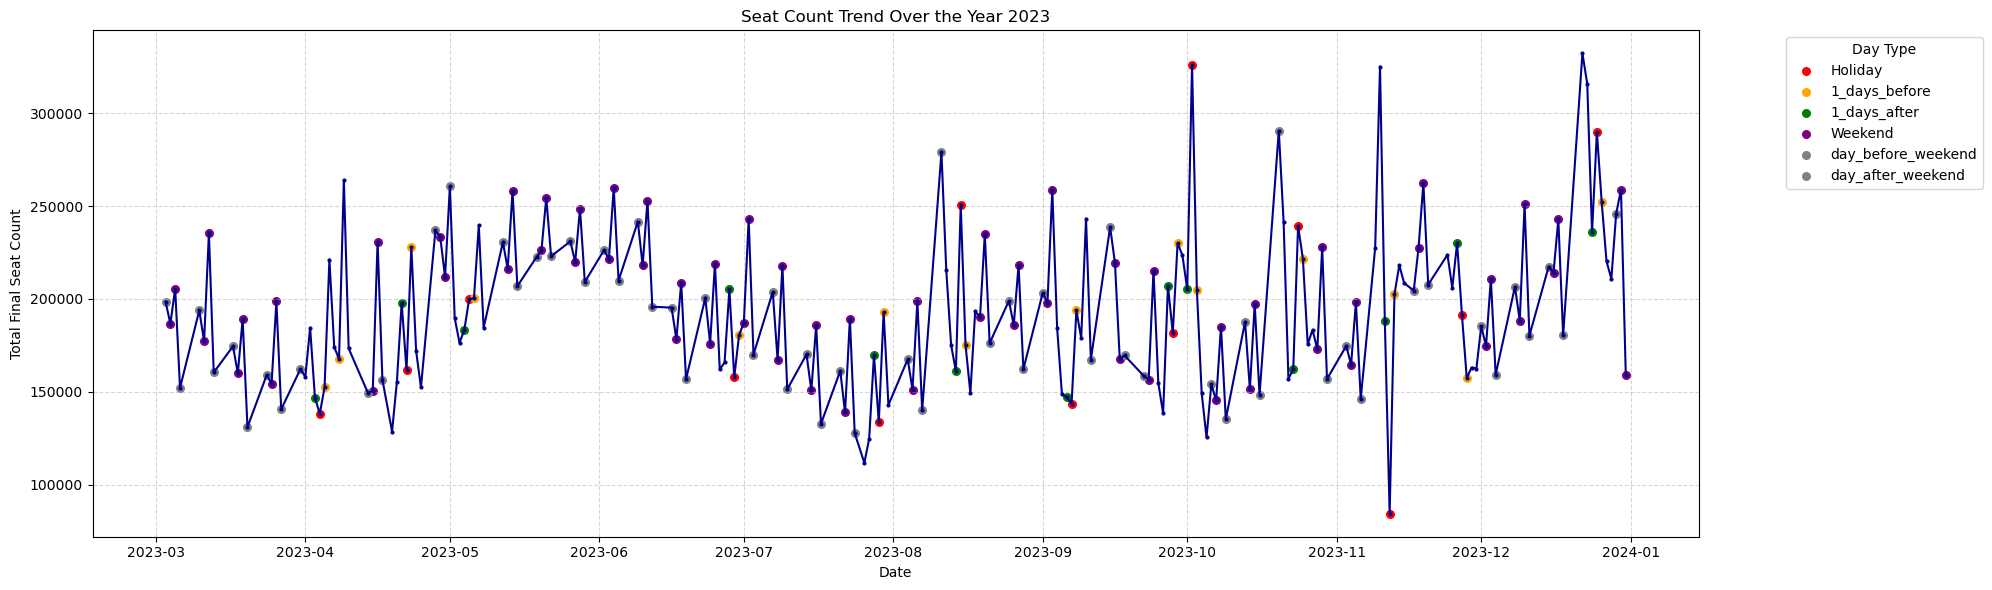

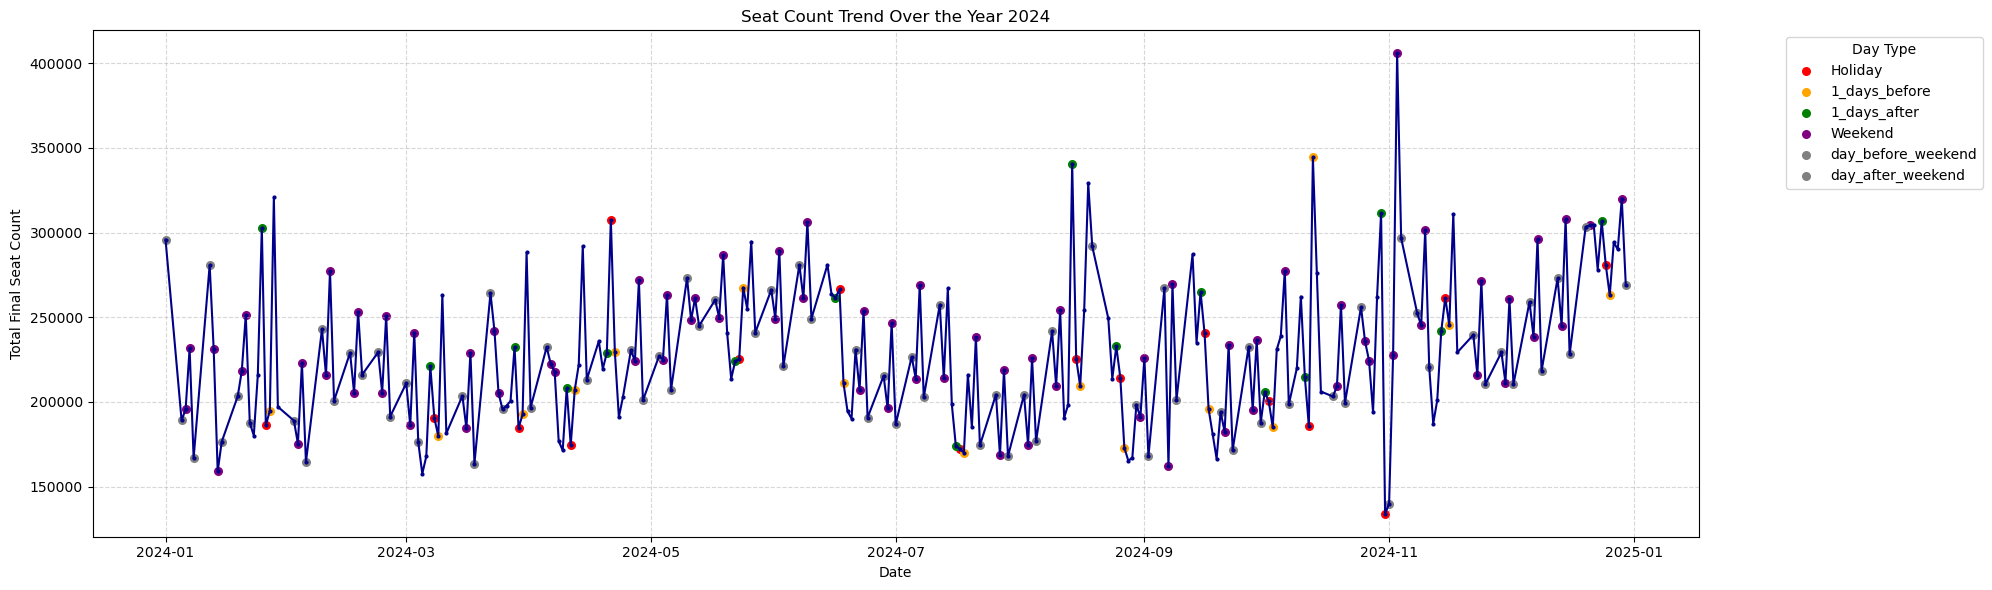

In [52]:
for year in filtered_df['year'].unique():
    yearly_df = filtered_df[filtered_df['year'] == year].copy()
    
    # Sort by date
    yearly_df = yearly_df.sort_values('doj')
    
    # Aggregate total seat count per date
    daily_df = (
        yearly_df.groupby(['doj', 'holiday_proximity_label'])['final_seatcount']
        .sum()
        .reset_index()
    )

    # Plot
    plt.figure(figsize=(20, 6))
    plt.plot(daily_df['doj'], daily_df['final_seatcount'], color='darkblue', marker='o', markersize=2)
    plt.title(f"Seat Count Trend Over the Year {year}")
    plt.xlabel("Date")
    plt.ylabel("Total Final Seat Count")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Highlight holidays and proximity with scatter markers
    for label_type, color in {
        "Holiday": "red",
        "1_days_before": "orange",
        "1_days_after": "green",
        "Weekend": "purple",
        "day_before_weekend": "gray",
        "day_after_weekend": "gray"
    }.items():
        subset = daily_df[daily_df['holiday_proximity_label'].str.contains(label_type, na=False)]
        plt.scatter(subset['doj'], subset['final_seatcount'], color=color, label=label_type, s=30)

    plt.legend(title="Day Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


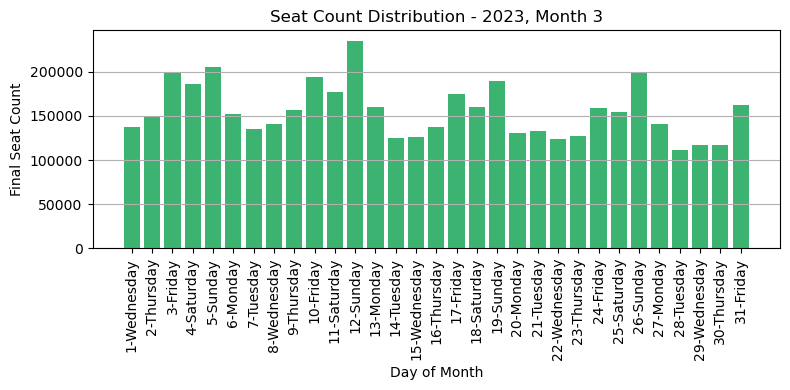

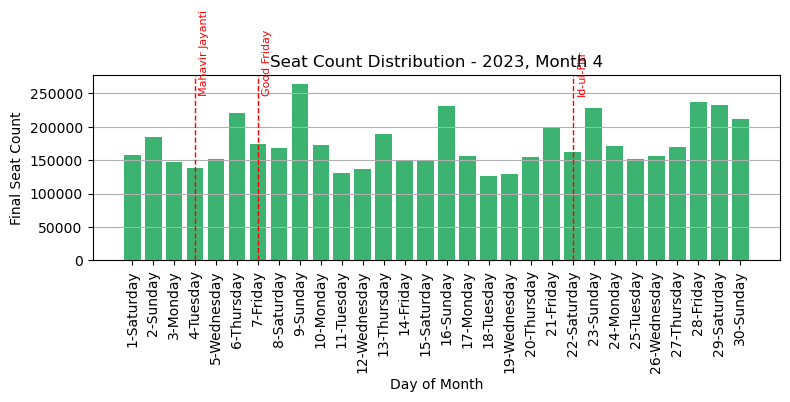

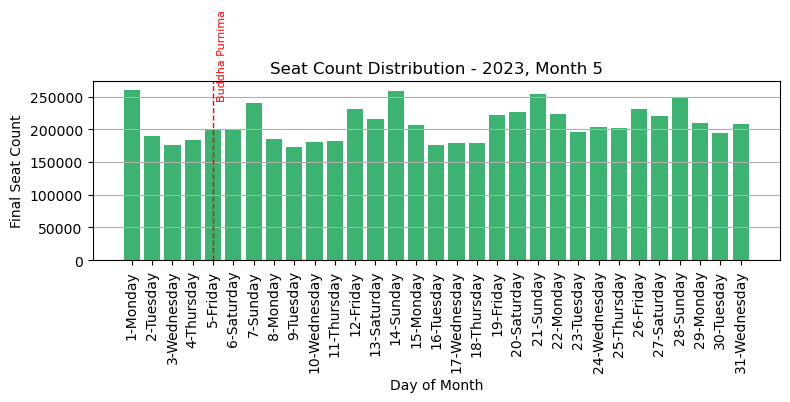

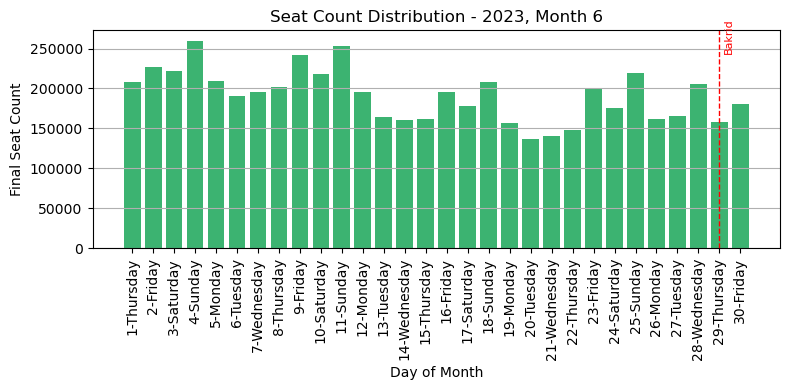

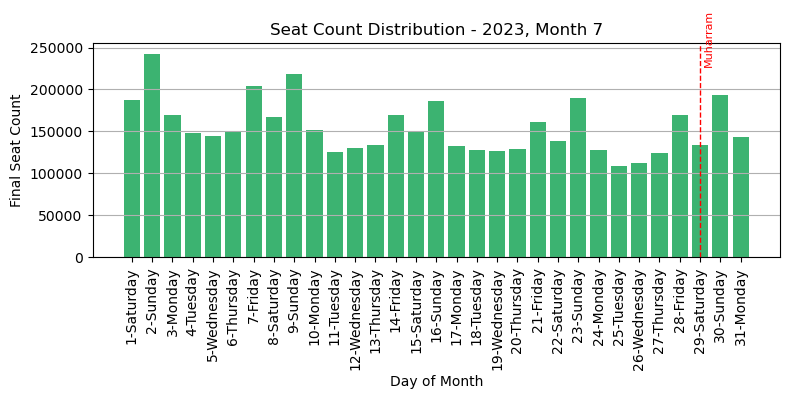

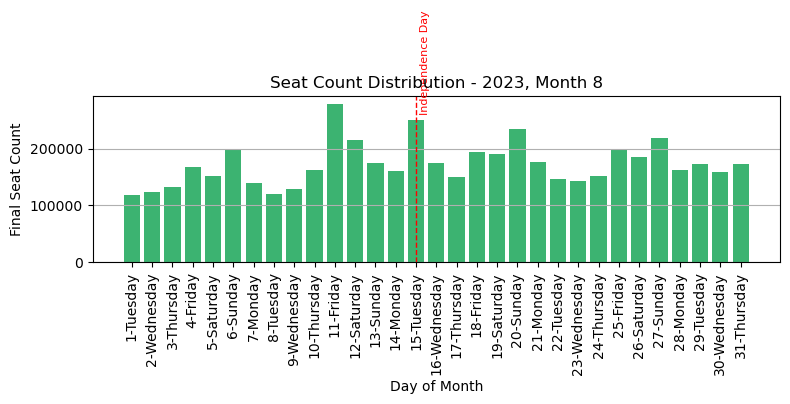

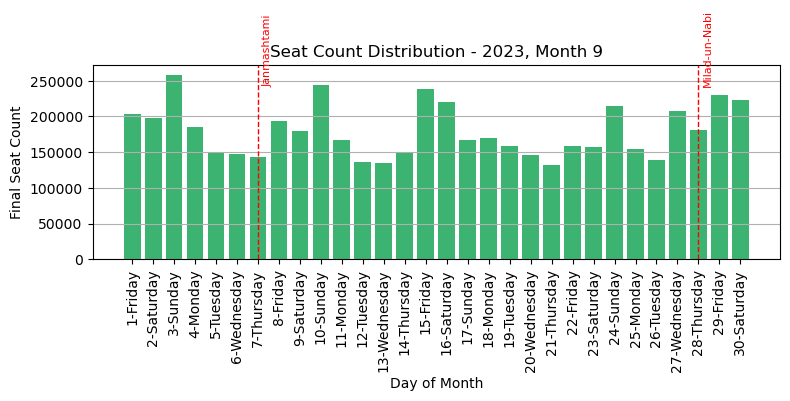

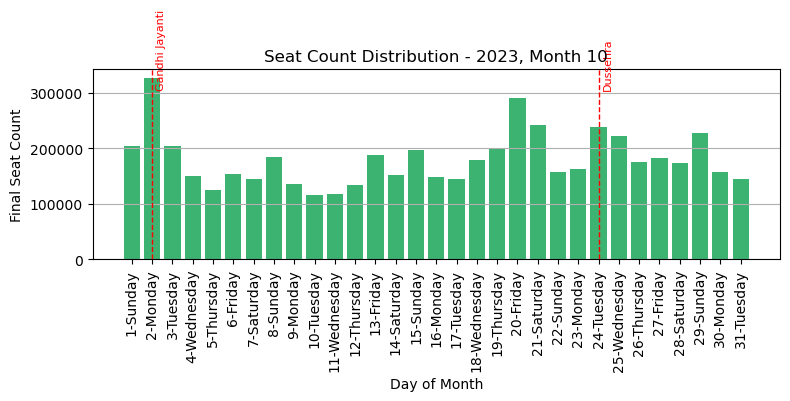

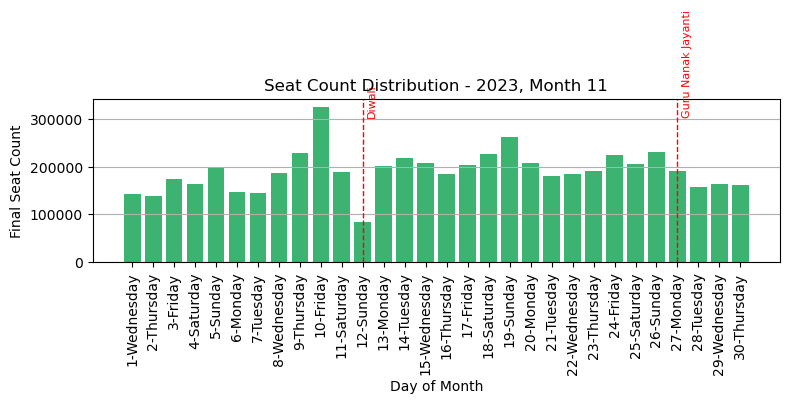

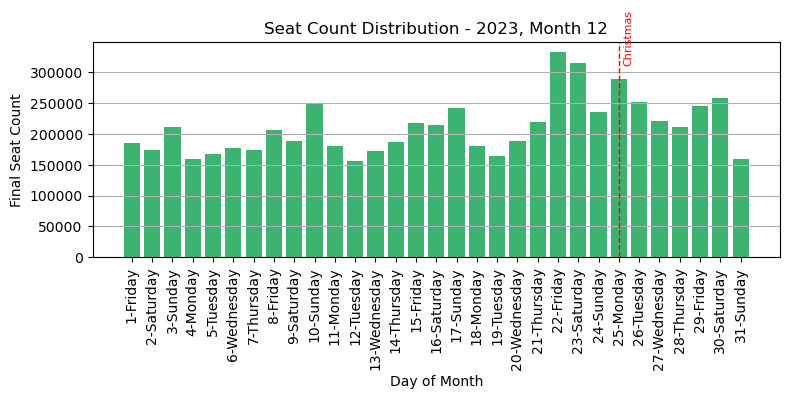

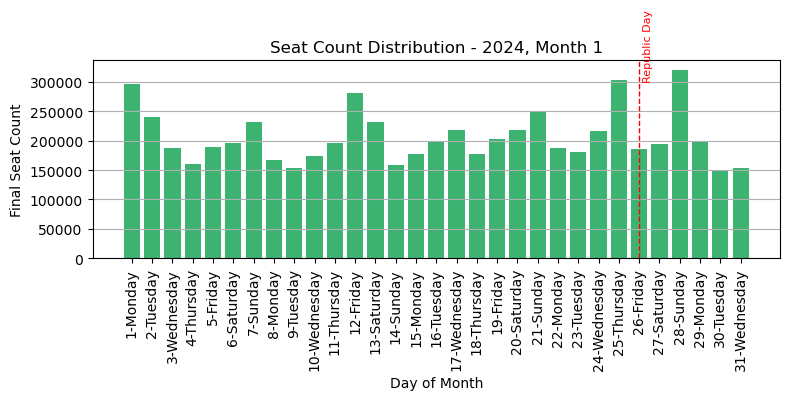

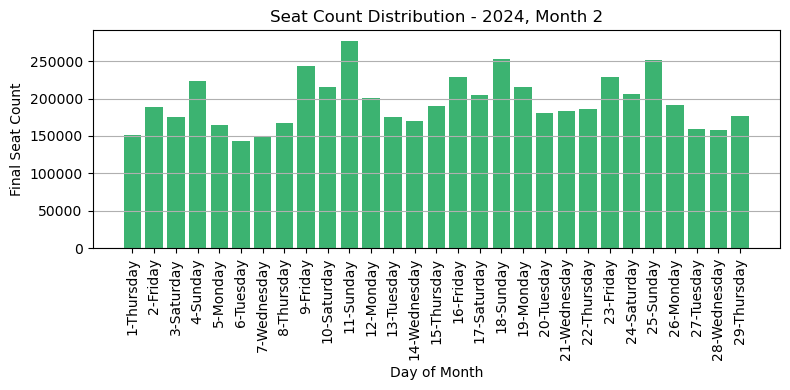

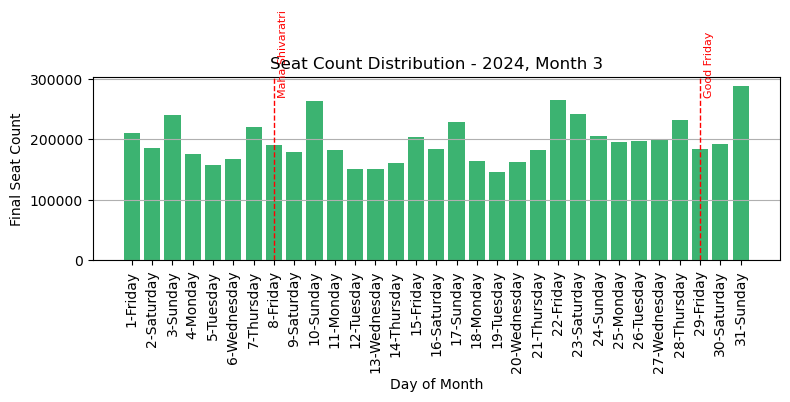

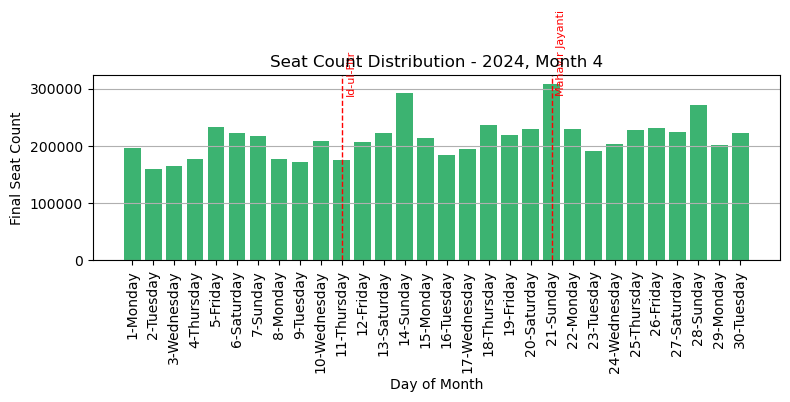

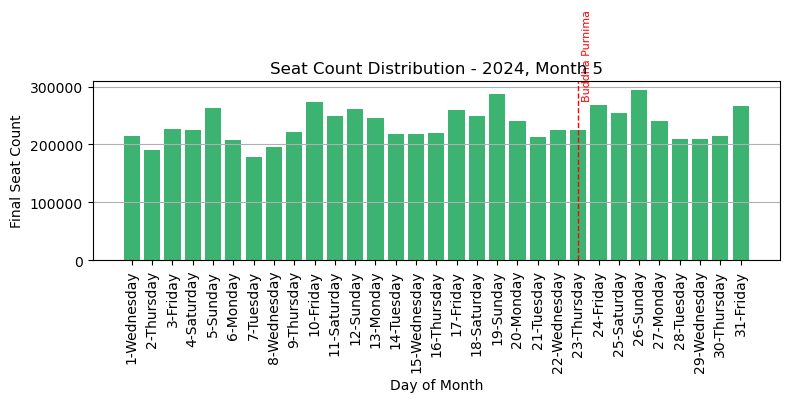

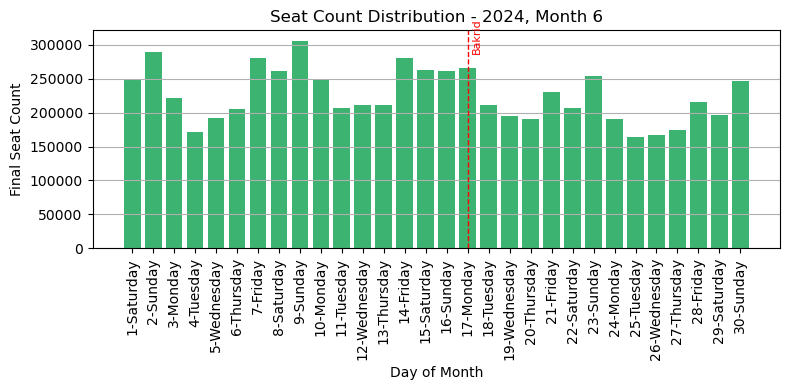

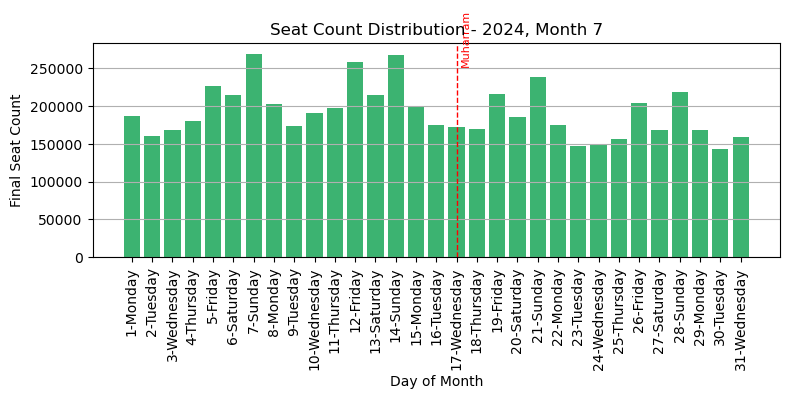

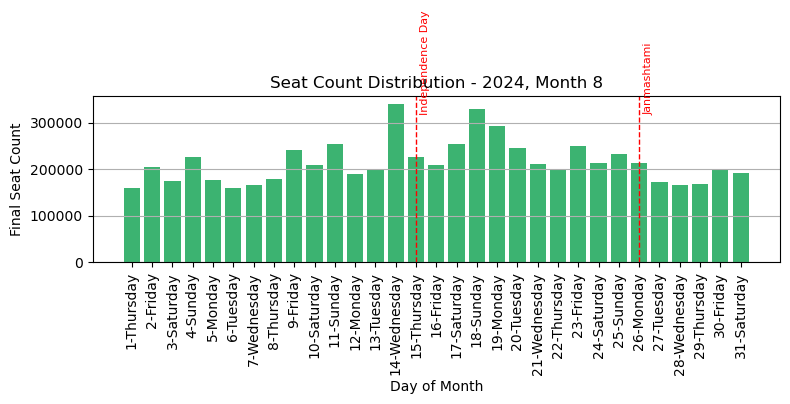

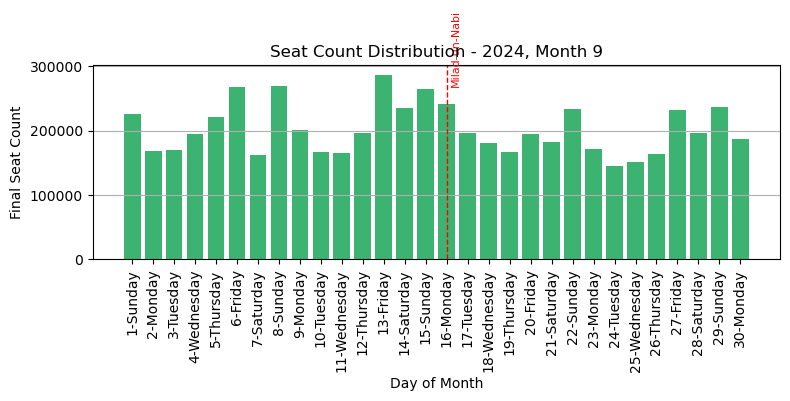

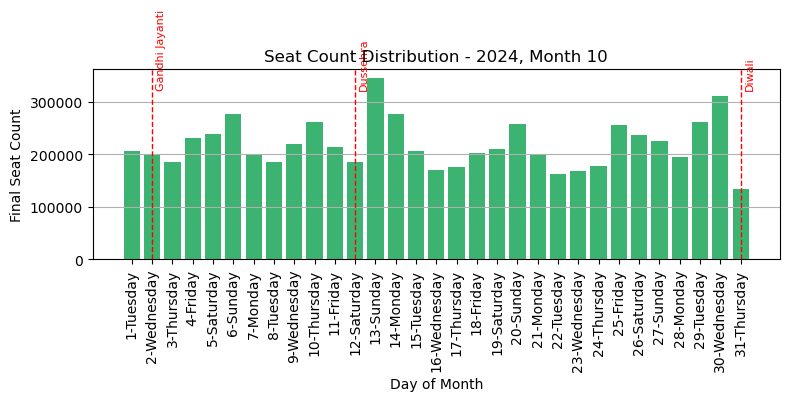

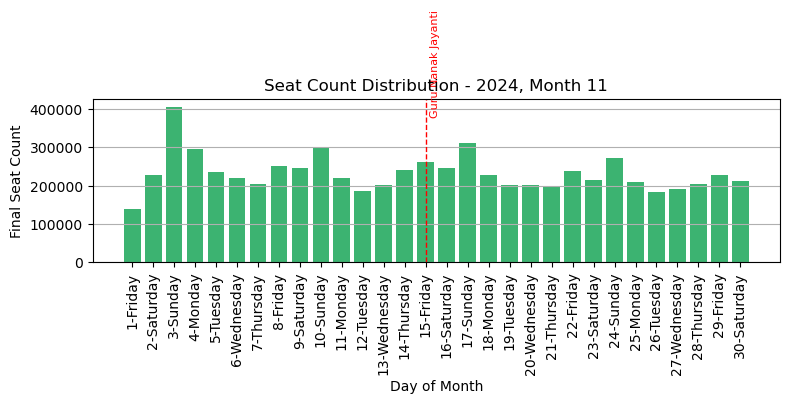

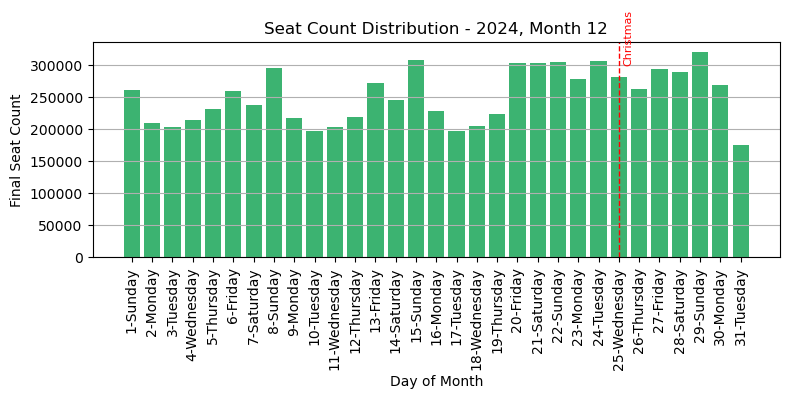

In [39]:
years = train_combined['year'].unique()
for year in years:
    yearly_df = train_combined[train_combined['year'] == year]
    
    for month in range(1, 13):
        month_df = yearly_df[yearly_df['month'] == month]
        
        if month_df.empty:
            continue

        # Group by day of the month
        daywise = month_df.groupby(['day', 'weekday_name'])['final_seatcount'].sum().reset_index()

        # Get holidays in this specific year + month
        holiday_df = (
            train_combined[
                (train_combined['year'] == year) &
                (train_combined['date_holiday'].dt.month == month)
            ][['date_holiday', 'holiday_name']]
            .drop_duplicates()
        )
        holiday_df['holiday_day'] = holiday_df['date_holiday'].dt.day

        # Plot
        plt.figure(figsize=(8, 4))
        plt.bar(daywise['day'], daywise['final_seatcount'], color='mediumseagreen')
        plt.title(f'Seat Count Distribution - {year}, Month {month}')
        plt.xlabel('Day of Month')
        plt.ylabel('Final Seat Count')
        #plt.xticks(range(1, 32))
        xtick_labels = [f"{day}-{wk}" for day, wk in zip(daywise['day'], daywise['weekday_name'])]
        plt.xticks(daywise['day'], xtick_labels, rotation=90)
        plt.grid(axis='y')

        # Add holiday markers
        for _, row in holiday_df.iterrows():
            day = row['holiday_day']
            name = row['holiday_name']
            plt.axvline(x=day, color='red', linestyle='--', linewidth=1)
            plt.text(day + 0.2, plt.ylim()[1] * 0.9, name, rotation=90, color='red', fontsize=8)

        plt.tight_layout()
        plt.show()

In [40]:
train_transaction = pd.merge(train_combined, transaction, on=['doj', 'srcid', 'destid'], how='left')

In [41]:
print(train_transaction)

               doj  srcid  destid  final_seatcount  year date_holiday  \
0       2023-03-01     45      46           2838.0  2023          NaT   
1       2023-03-01     45      46           2838.0  2023          NaT   
2       2023-03-01     45      46           2838.0  2023          NaT   
3       2023-03-01     45      46           2838.0  2023          NaT   
4       2023-03-01     45      46           2838.0  2023          NaT   
...            ...    ...     ...              ...   ...          ...   
2083195 2024-12-31     19      30           2040.0  2024          NaT   
2083196 2024-12-31     19      30           2040.0  2024          NaT   
2083197 2024-12-31     19      30           2040.0  2024          NaT   
2083198 2024-12-31     19      30           2040.0  2024          NaT   
2083199 2024-12-31     19      30           2040.0  2024          NaT   

        holiday_name  month  day weekday_name holiday_proximity_label  \
0                NaN      3    1    Wednesday     

In [42]:
'''
total_rows = len(transaction)

# Check which columns make unique combinations
from itertools import combinations

columns = transaction.columns.tolist()

for i in range(1, len(columns) + 1):
    for combo in combinations(columns, i):
        if transaction.duplicated(subset=list(combo)).sum() == 0:
            print(f"✅ Unique combination: {combo}")
            break  # Stop at the first found smallest unique set
    else:
        continue
    break
'''

'\ntotal_rows = len(transaction)\n\n# Check which columns make unique combinations\nfrom itertools import combinations\n\ncolumns = transaction.columns.tolist()\n\nfor i in range(1, len(columns) + 1):\n    for combo in combinations(columns, i):\n        if transaction.duplicated(subset=list(combo)).sum() == 0:\n            print(f"✅ Unique combination: {combo}")\n            break  # Stop at the first found smallest unique set\n    else:\n        continue\n    break\n'

In [43]:
'''
total_rows = len(train)

# Check which columns make unique combinations
from itertools import combinations

columns = train.columns.tolist()

for i in range(1, len(columns) + 1):
    for combo in combinations(columns, i):
        if train.duplicated(subset=list(combo)).sum() == 0:
            print(f"✅ Unique combination: {combo}")
            break  # Stop at the first found smallest unique set
    else:
        continue
    break
'''

'\ntotal_rows = len(train)\n\n# Check which columns make unique combinations\nfrom itertools import combinations\n\ncolumns = train.columns.tolist()\n\nfor i in range(1, len(columns) + 1):\n    for combo in combinations(columns, i):\n        if train.duplicated(subset=list(combo)).sum() == 0:\n            print(f"✅ Unique combination: {combo}")\n            break  # Stop at the first found smallest unique set\n    else:\n        continue\n    break\n'

In [44]:
'''
transaction['unique_column'] = (
    transaction['doj'].astype(str) + '_' +
    transaction['srcid'].astype(str) + '_' +
    transaction['destid'].astype(str)
)
'''

"\ntransaction['unique_column'] = (\n    transaction['doj'].astype(str) + '_' +\n    transaction['srcid'].astype(str) + '_' +\n    transaction['destid'].astype(str)\n)\n"

In [45]:
#print(transaction)

In [46]:
'''
train_combined['unique_column'] = (
    train_combined['doj'].astype(str) + '_' +
    train_combined['srcid'].astype(str) + '_' +
    train_combined['destid'].astype(str)
)
'''

"\ntrain_combined['unique_column'] = (\n    train_combined['doj'].astype(str) + '_' +\n    train_combined['srcid'].astype(str) + '_' +\n    train_combined['destid'].astype(str)\n)\n"

In [47]:
#print(train_combined)

In [48]:
#train_transact = pd.merge(train_transaction, transaction, on=['doi','srcid', 'destid'], how='left')

In [49]:
#print(train_transaction)

In [50]:
distinct = train_transaction.drop_duplicates()
print(distinct.shape)
print(distinct.head())

(2083200, 19)
         doj  srcid  destid  final_seatcount  year date_holiday holiday_name  \
0 2023-03-01     45      46           2838.0  2023          NaT          NaN   
1 2023-03-01     45      46           2838.0  2023          NaT          NaN   
2 2023-03-01     45      46           2838.0  2023          NaT          NaN   
3 2023-03-01     45      46           2838.0  2023          NaT          NaN   
4 2023-03-01     45      46           2838.0  2023          NaT          NaN   

   month  day weekday_name holiday_proximity_label        doi srcid_region  \
0      3    1    Wednesday              Normal Day 2023-01-30    Karnataka   
1      3    1    Wednesday              Normal Day 2023-01-31    Karnataka   
2      3    1    Wednesday              Normal Day 2023-02-01    Karnataka   
3      3    1    Wednesday              Normal Day 2023-02-02    Karnataka   
4      3    1    Wednesday              Normal Day 2023-02-03    Karnataka   

  destid_region srcid_tier destid_ti

In [ ]:
#merged_table = pd.merge(transaction_2023, train_sub_2023, on='year', how='left')
#print(merged_table)

In [ ]:
#combined_samble = combined.sample(n=1000, random_state=42)

In [ ]:
#merged_table = pd.merge(combined, train_sub, on='doj', how='left')
#print(merged_table)
#merged_table.info()

In [ ]:
#train_samble = train_sub.sample(n=1000, random_state=42)

In [ ]:
#merged_table = pd.merge(combined_samble, train_samble, on='doj', how='left')

In [ ]:
#df_filtered = transaction[transaction['days_advance'] == 5]